In [1]:
# Installation : pip install flake8 pycodestyle pycodestyle_magic
# Activate %%flake8 magic function
%load_ext pycodestyle_magic

# Importations et inspection

## Importation des modules

In [2]:
# %%flake8  # checking PEP8 compliance
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import functions.functions_p5 as functions_p5

# increase the maximum number of columns to display
pd.set_option("display.max_columns", 1000)  # Maximum number of columns

In [3]:
# Reload importation of module
import importlib
importlib.reload(functions_p5)

<module 'functions.functions_p5' from 'D:\\OneDrive\\OpenClassrooms\\Parcours Data Scientist\\projet5\\functions\\functions_p5.py'>

## Importation des données

In [4]:
# %%flake8  # checking PEP8 compliance
import os
from IPython.display import display

dir_name = 'data/raw'
dict_df = {}

# Importing .csv files as pd.DataFrame
for file_name in os.listdir(dir_name):
    if file_name[-4:] == '.csv':
        file_path = os.path.join(dir_name, file_name)
        dict_df[file_name[:-4]] = pd.read_csv(file_path)

# Iterating upon DataFrames
for name, data_df in dict_df.items():

    # Displays name and head of each DataFrame
    print(name, "\n")
    display(data_df.head(2))

olist_customers_dataset 



,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP


olist_geolocation_dataset 



,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP


olist_orders_dataset 



,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00


olist_order_items_dataset 



,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.9,19.93


olist_order_payments_dataset 



,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39


olist_order_reviews_dataset 



,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13


olist_products_dataset 



,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0


olist_sellers_dataset 



,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP


product_category_name_translation 



,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories


## Inspection de l'intégrité des données (valeurs dupliquées)

In [5]:
# %%flake8  # checking PEP8 compliance

def contains_duplicates(dataframe):
    """This function checks the presence of duplicates rows in a dataframe."""

    mask = dataframe.duplicated(keep='first')
    nb_duplicates = len(dataframe[mask])

    if nb_duplicates == 0:
        return False

    else:
        return True

In [6]:
# %%flake8  # checking PEP8 compliance

# Iterating upon DataFrames
for name, data_df in dict_df.items():

    # If there are duplicates data
    if contains_duplicates(data_df):
        print("------------------")
        print(name, "\n")

        mask = data_df.duplicated(keep='first')
        nb_duplicates = len(data_df[mask])

        # Displays the number of duplicates
        print("DataFrame contains {} duplicates.".format(nb_duplicates))

------------------
olist_geolocation_dataset 

DataFrame contains 261831 duplicates.


La table 'olist_geolocation_dataset' contient des valeurs dupliquées, mais nous ne supprimons pas encore les valeurs dupliquées. En effet, nous calculerons le barycentre des positions géographiques (latitude, longitude) associées à un même code postal. Or, les valeurs dupliquées sont une information utile dans le calcul de ces barycentres.

## Inspection de l'intégrité des données (valeurs manquantes)

In [7]:
# %%flake8  # checking PEP8 compliance

# Iterating upon DataFrames
for name, data_df in dict_df.items():
    nb_rows = len(data_df)
    nb_cols = len(data_df.columns)
    nb_data = data_df.count().sum()

    # If there are missing data
    if nb_data != nb_cols * nb_rows:
        print("------------------")
        print(name, "\n")

        # Displays the global filling rate of the DataFrame
        functions_p5.global_filling_rate(data_df)

------------------
olist_orders_dataset 

DataFrame has 99441 rows and 8 columns.

Global filling rate of the DataFrame: 99.38%
Missing values in the DataFrame: 4908 (0.62%)

Number of rows with missing values: 2980 (3.00%)
Number of columns with missing values: 3 (37.50%)
------------------
olist_order_reviews_dataset 

DataFrame has 100000 rows and 7 columns.

Global filling rate of the DataFrame: 79.07%
Missing values in the DataFrame: 146532 (20.93%)

Number of rows with missing values: 90014 (90.01%)
Number of columns with missing values: 2 (28.57%)
------------------
olist_products_dataset 

DataFrame has 32951 rows and 9 columns.

Global filling rate of the DataFrame: 99.17%
Missing values in the DataFrame: 2448 (0.83%)

Number of rows with missing values: 611 (1.85%)
Number of columns with missing values: 8 (88.89%)


### Table des commandes

In [8]:
# %%flake8  # checking PEP8 compliance

# Inspection of the columns with missing data
data = dict_df['olist_orders_dataset']
display(functions_p5.columns_filling_rate(
    data,
    columns='all',
    missing_only=True)
       )

# Identification of rows with missing or null values
mask = data.isnull().any(axis=1)  # pd.Series of boolean
df_masked = data[mask]

df_masked.head()

,nb_values,missing_values,filling_rate
order_delivered_customer_date,96476.0,2965.0,0.970183
order_delivered_carrier_date,97658.0,1783.0,0.982070
order_approved_at,99281.0,160.0,0.998391


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaN,NaN,2017-05-09 00:00:00
44,ee64d42b8cf066f35eac1cf57de1aa85,caded193e8e47b8362864762a83db3c5,shipped,2018-06-04 16:44:48,2018-06-05 04:31:18,2018-06-05 14:32:00,NaN,2018-06-28 00:00:00
103,0760a852e4e9d89eb77bf631eaaf1c84,d2a79636084590b7465af8ab374a8cf5,invoiced,2018-08-03 17:44:42,2018-08-07 06:15:14,NaN,NaN,2018-08-21 00:00:00
128,15bed8e2fec7fdbadb186b57c46c92f2,f3f0e613e0bdb9c7cee75504f0f90679,processing,2017-09-03 14:22:03,2017-09-03 14:30:09,NaN,NaN,2017-10-03 00:00:00
154,6942b8da583c2f9957e990d028607019,52006a9383bf149a4fb24226b173106f,shipped,2018-01-10 11:33:07,2018-01-11 02:32:30,2018-01-11 19:39:23,NaN,2018-02-07 00:00:00


Manifestement les données manquantes de la table des commande ('olist_orders_dataset') correspondent aux commandes non-livrées. Pour éviter les problèmes ultérieurs, nous allons faire de l'imputation pour ces commandes.

### Table des évaluations

In [9]:
# %%flake8  # checking PEP8 compliance

# Inspection of the columns with missing data
data = dict_df['olist_order_reviews_dataset']
display(functions_p5.columns_filling_rate(
    data,
    columns='all',
    missing_only=True)
       )

# Identification of rows with missing or null values
mask = data.isnull().any(axis=1)  # pd.Series of boolean
df_masked = data[mask]

df_masked.head()

,nb_values,missing_values,filling_rate
review_comment_title,11715.0,88285.0,0.11715
review_comment_message,41753.0,58247.0,0.41753


,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [10]:
dict_df['olist_order_reviews_dataset'].describe()

,review_score
count,100000.000000
mean,4.070890
std,1.359663
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


Manifestement, les données manquantes dans la table des évaluations ('olist_order_reviews_dataset') correspondent aux cas où les clients n'ont pas laissé d'évaluation. Nous traitons cela dans l'immédiat en remplaçant les valeurs manquantes par une chaîne de caractères vide, et plus tard en convertissant les deux variables concernées en variables booléenne. Étrangement, la note est remplie à 100%. Olist semble avoir fait une imputation…

In [11]:
# %%flake8  # checking PEP8 compliance

# Filling the missing values for comment title and comment message by ''
dict_df['olist_order_reviews_dataset'][
    ['review_comment_title', 'review_comment_message']
] = dict_df['olist_order_reviews_dataset'][
    ['review_comment_title', 'review_comment_message']
].fillna(value='')

# Checking the results of imputation
functions_p5.global_filling_rate(dict_df['olist_order_reviews_dataset'])

DataFrame has 100000 rows and 7 columns.

Global filling rate of the DataFrame: 100.00%
Missing values in the DataFrame: 0 (0.00%)

Number of rows with missing values: 0 (0.00%)
Number of columns with missing values: 0 (0.00%)


### Table des produits

In [12]:
#%%flake8  # checking PEP8 compliance

# Inspection of the columns with missing data
data = dict_df['olist_products_dataset']
display(functions_p5.columns_filling_rate(
    data,
    columns='all',
    missing_only=True)
       )

# Identification of rows with missing or null values
mask = data.isnull().any(axis=1)  # pd.Series of boolean
df_masked = data[mask]

df_masked.head()

,nb_values,missing_values,filling_rate
product_category_name,32341.0,610.0,0.981488
product_name_lenght,32341.0,610.0,0.981488
product_description_lenght,32341.0,610.0,0.981488
product_photos_qty,32341.0,610.0,0.981488
product_weight_g,32949.0,2.0,0.999939
product_length_cm,32949.0,2.0,0.999939
product_height_cm,32949.0,2.0,0.999939
product_width_cm,32949.0,2.0,0.999939


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
105,a41e356c76fab66334f36de622ecbd3a,NaN,NaN,NaN,NaN,650.0,17.0,14.0,12.0
128,d8dee61c2034d6d075997acef1870e9b,NaN,NaN,NaN,NaN,300.0,16.0,7.0,20.0
145,56139431d72cd51f19eb9f7dae4d1617,NaN,NaN,NaN,NaN,200.0,20.0,20.0,20.0
154,46b48281eb6d663ced748f324108c733,NaN,NaN,NaN,NaN,18500.0,41.0,30.0,41.0
197,5fb61f482620cb672f5e586bb132eae9,NaN,NaN,NaN,NaN,300.0,35.0,7.0,12.0


Pour quelques produits (610), il manque toutes les informations de descriptif du produit. Et pour d'autres (2), il manque le poids et les dimensions du produit. Nous allons procéder à une imputation simple pour ces données manquantes.

In [13]:
# %%flake8  # checking PEP8 compliance

# Convert 'product_category_name' to categorical
dict_df['olist_products_dataset']['product_category_name'] = \
    dict_df['olist_products_dataset']['product_category_name']\
    .astype('category')

# Proceed to column-wise imputations (based on dtypes)
dict_df['olist_products_dataset'] = \
    functions_p5.smart_imputation(dict_df['olist_products_dataset'])

# Checking the results of imputation
functions_p5.global_filling_rate(dict_df['olist_products_dataset'])

DataFrame has 32951 rows and 9 columns.

Global filling rate of the DataFrame: 100.00%
Missing values in the DataFrame: 0 (0.00%)

Number of rows with missing values: 0 (0.00%)
Number of columns with missing values: 0 (0.00%)


# **Jointures des tables**
Les données sont présentées dans une base de données relationnelle sous forme 'normale'. Nous nous intéressons à la segmentation des clients. Nous allons donc faire les jointures de données nécessaires sur les clients pour avoir toutes les données dans une table unique.

In [14]:
# %%flake8  # checking PEP8 compliance

def joining_check(left_df, right_df, left_key, right_key):
    '''This function checks the keys before a joining of DataFrames.'''

    # Checking the shape before joining
    left_set = set(left_df[left_key].unique())
    right_set = set(right_df[right_key].unique())

    # Display some results
    nb_shared_keys = len(left_set & right_set)  # set intersection
    print("Number of shared values of keys between left_df and right_df: {}"
          .format(nb_shared_keys))

    nb_left_specific_keys = len(left_set - right_set)  # sets difference
    print("Number of specifique values of key '{}' for left_df: {}"
          .format(left_key, nb_left_specific_keys))

    nb_right_specific_keys = len(right_set - left_set)  # sets difference
    print("Number of specifique values of key '{}' for right_df: {}"
          .format(left_key, nb_right_specific_keys))

    # Number of rows in left_df with one of the specific values of key
    mask = (left_df[left_key].isin(left_set - right_set))
    nb_left_rows_w_specific_keys = len(left_df[mask])
    print("Number of rows in left_df with a specific value of key: {}"
          .format(nb_left_rows_w_specific_keys))

    # Print a few rows to illustrate the case of specific values on left
    if nb_left_rows_w_specific_keys > 0:
        display(left_df[mask].head())

## Jointure des tables 'customers_dataset' et 'orders_dataset'
Pour associer les cilents aux commandes. Nous faisons une jointure extérieure "gauche" pour conserver les données des clients qui ne sont pas associés à une commande.

In [15]:
# %%flake8  # checking PEP8 compliance

# Dataframes to join
df1 = dict_df['olist_customers_dataset']
df2 = dict_df['olist_orders_dataset']

# Joining dataframe, specifying the column to merge on
data = pd.merge(df1, df2, on='customer_id', how="left")  # left join

# Setting up the variables
left_df = df1
right_df = df2
left_key = 'customer_id'
right_key = 'customer_id'

# Checking shapes
joining_check(left_df, right_df, left_key, right_key=left_key)

Number of shared values of keys between left_df and right_df: 99441
Number of specifique values of key 'customer_id' for left_df: 0
Number of specifique values of key 'customer_id' for right_df: 0
Number of rows in left_df with a specific value of key: 0


Les valeurs manquantes proviennent des commandes non livrées.

## Jointure avec la table 'order_payments_dataset'

In [16]:
# %%flake8  # checking PEP8 compliance

# Dataframe to join
df1 = data
df2 = dict_df['olist_order_payments_dataset']

# Joining dataframe, specifying the column to merge on
data = pd.merge(df1, df2, on='order_id', how="left")  # inner join

# Setting up the variables
left_df = df1
right_df = df2
left_key = 'order_id'
right_key = 'order_id'

# Checking shapes
joining_check(left_df, right_df, left_key, right_key=left_key)

Number of shared values of keys between left_df and right_df: 99440
Number of specifique values of key 'order_id' for left_df: 1
Number of specifique values of key 'order_id' for right_df: 0
Number of rows in left_df with a specific value of key: 1


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
21125,86dc2ffce2dfff336de2f386a786e574,830d5b7aaa3b6f1e9ad63703bec97d23,14600,sao joaquim da barra,SP,bfbd0f9bdef84302105ad712db648a6c,delivered,2016-09-15 12:16:38,2016-09-15 12:16:38,2016-11-07 17:11:53,2016-11-09 07:47:38,2016-10-04 00:00:00


In [17]:
dict_df['olist_order_payments_dataset'].head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [18]:
# %%flake8  # checking PEP8 compliance

dict_df['olist_order_payments_dataset'].duplicated(
    subset=['order_id']).value_counts()

False    99440
True      4446
dtype: int64

Une commande ne correspond à aucune entrée dans la table des paiements.

## Jointure avec la table 'order_reviews_dataset'

In [19]:
# %%flake8  # checking PEP8 compliance

# Dataframe to join
df1 = data
df2 = dict_df['olist_order_reviews_dataset']

# Joining dataframe, specifying the column to merge on
data = pd.merge(df1, df2, on='order_id', how="left")  # left join

# Setting up the variables
left_df = df1
right_df = df2
left_key = 'order_id'
right_key = 'order_id'

# Checking shapes
joining_check(left_df, right_df, left_key, right_key=left_key)

Number of shared values of keys between left_df and right_df: 99441
Number of specifique values of key 'order_id' for left_df: 0
Number of specifique values of key 'order_id' for right_df: 0
Number of rows in left_df with a specific value of key: 0


## Jointure avec la table 'order_item_dataset'

In [20]:
# %%flake8  # checking PEP8 compliance

# Dataframe to join
df1 = data
df2 = dict_df['olist_order_items_dataset']

# Joining dataframe, specifying the column to merge on
data = pd.merge(df1, df2, on='order_id', how="left")  # left join

# Setting up the variables
left_df = df1
right_df = df2
left_key = 'order_id'
right_key = 'order_id'

# Checking shapes
joining_check(left_df, right_df, left_key, right_key=left_key)

Number of shared values of keys between left_df and right_df: 98666
Number of specifique values of key 'order_id' for left_df: 775
Number of specifique values of key 'order_id' for right_df: 0
Number of rows in left_df with a specific value of key: 833


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
48,f34a6e874087ec1f0e3dab9fdf659c5d,233896de79986082f1f479f1f85281cb,38300,ituiutaba,MG,6e98de3a85c84ead6689189b825d35b5,canceled,2018-03-15 10:07:02,2018-03-15 10:29:33,NaN,NaN,2018-04-09 00:00:00,1.0,credit_card,1.0,73.16,e76cda681b681b65fffa28dfc0030641,1,,Muita demora pra entregar e acima de tudo nao ...,2018-04-11 00:00:00,2018-04-11 13:17:25
299,5bfe800011656c0afb81db64519982db,0071f46a072a9ae25bbe4438b15efe9c,16011,aracatuba,SP,df8c077268f7f3baaac0892eb3143642,unavailable,2017-02-01 00:04:17,2017-02-01 00:30:55,NaN,NaN,2017-03-10 00:00:00,1.0,credit_card,4.0,174.54,3f793c533cf5b3e21425b1ab73568350,3,,Gostaria de saber sobre o meu produto pois já ...,2017-03-12 00:00:00,2017-03-14 11:08:50
388,b08064e24083fee8fbe8797902b07ecd,035f60af6e7d7f78470e9443be08d339,28495,aperibe,RJ,c609f82bcf7a90292a5940205ebd7e93,unavailable,2018-05-13 16:45:55,2018-05-13 17:11:58,NaN,NaN,2018-06-05 00:00:00,1.0,credit_card,2.0,117.78,2c849b1f2ee43364af4923d48b9f0943,1,Não recebi o produto,Ainda não recebi o produto. \r\nJá paguei a pr...,2018-06-07 00:00:00,2018-06-09 15:38:19
398,536f46cc0f2f2b1e40d056f7998f0254,340152332a04149987a705602615f0d0,87030,maringa,PR,cb4a79c1e6c9ae44302861e7602cc449,unavailable,2017-12-06 15:46:07,2017-12-06 15:57:29,NaN,NaN,2018-01-03 00:00:00,1.0,credit_card,1.0,66.02,4d3c61768eb47216ecf732bbbd8bef3c,1,,"Absurdo! Venderam o produto, paguei e, sem nen...",2018-01-05 00:00:00,2018-01-15 11:04:49
584,8118922685d2e2c0205f060be4f2579c,d0e87d00021530383c16452a39a393ba,45810,porto seguro,BA,af264f3527e94e431f0dcd56cd6b406d,unavailable,2017-07-12 14:49:11,2017-07-12 15:04:10,NaN,NaN,2017-08-11 00:00:00,1.0,credit_card,1.0,46.69,609ce0b03d6d69c4b43a55e91bf422a8,5,,O produto foi entregue corretamente.,2017-08-13 00:00:00,2017-10-27 23:46:21


## Jointure avec la table 'products_dataset'

In [21]:
# %%flake8  # checking PEP8 compliance

# Dataframe to join
df1 = data
df2 = dict_df['olist_products_dataset']

# Joining dataframe, specifying the column to merge on
data = pd.merge(df1, df2, on='product_id', how="left")  # left join

# Setting up the variables
left_df = df1
right_df = df2
left_key = 'product_id'
right_key = 'product_id'

# Checking shapes
joining_check(left_df, right_df, left_key, right_key=left_key)

Number of shared values of keys between left_df and right_df: 32951
Number of specifique values of key 'product_id' for left_df: 1
Number of specifique values of key 'product_id' for right_df: 0
Number of rows in left_df with a specific value of key: 833


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
52,f34a6e874087ec1f0e3dab9fdf659c5d,233896de79986082f1f479f1f85281cb,38300,ituiutaba,MG,6e98de3a85c84ead6689189b825d35b5,canceled,2018-03-15 10:07:02,2018-03-15 10:29:33,NaN,NaN,2018-04-09 00:00:00,1.0,credit_card,1.0,73.16,e76cda681b681b65fffa28dfc0030641,1,,Muita demora pra entregar e acima de tudo nao ...,2018-04-11 00:00:00,2018-04-11 13:17:25,NaN,NaN,NaN,NaN,NaN,NaN
341,5bfe800011656c0afb81db64519982db,0071f46a072a9ae25bbe4438b15efe9c,16011,aracatuba,SP,df8c077268f7f3baaac0892eb3143642,unavailable,2017-02-01 00:04:17,2017-02-01 00:30:55,NaN,NaN,2017-03-10 00:00:00,1.0,credit_card,4.0,174.54,3f793c533cf5b3e21425b1ab73568350,3,,Gostaria de saber sobre o meu produto pois já ...,2017-03-12 00:00:00,2017-03-14 11:08:50,NaN,NaN,NaN,NaN,NaN,NaN
438,b08064e24083fee8fbe8797902b07ecd,035f60af6e7d7f78470e9443be08d339,28495,aperibe,RJ,c609f82bcf7a90292a5940205ebd7e93,unavailable,2018-05-13 16:45:55,2018-05-13 17:11:58,NaN,NaN,2018-06-05 00:00:00,1.0,credit_card,2.0,117.78,2c849b1f2ee43364af4923d48b9f0943,1,Não recebi o produto,Ainda não recebi o produto. \r\nJá paguei a pr...,2018-06-07 00:00:00,2018-06-09 15:38:19,NaN,NaN,NaN,NaN,NaN,NaN
448,536f46cc0f2f2b1e40d056f7998f0254,340152332a04149987a705602615f0d0,87030,maringa,PR,cb4a79c1e6c9ae44302861e7602cc449,unavailable,2017-12-06 15:46:07,2017-12-06 15:57:29,NaN,NaN,2018-01-03 00:00:00,1.0,credit_card,1.0,66.02,4d3c61768eb47216ecf732bbbd8bef3c,1,,"Absurdo! Venderam o produto, paguei e, sem nen...",2018-01-05 00:00:00,2018-01-15 11:04:49,NaN,NaN,NaN,NaN,NaN,NaN
661,8118922685d2e2c0205f060be4f2579c,d0e87d00021530383c16452a39a393ba,45810,porto seguro,BA,af264f3527e94e431f0dcd56cd6b406d,unavailable,2017-07-12 14:49:11,2017-07-12 15:04:10,NaN,NaN,2017-08-11 00:00:00,1.0,credit_card,1.0,46.69,609ce0b03d6d69c4b43a55e91bf422a8,5,,O produto foi entregue corretamente.,2017-08-13 00:00:00,2017-10-27 23:46:21,NaN,NaN,NaN,NaN,NaN,NaN


## Jointure avec la table 'translation_dataset'

In [22]:
# %%flake8  # checking PEP8 compliance

# Dataframe to join
df1 = data
df2 = dict_df['product_category_name_translation']

# Joining dataframe, specifying the column to merge on
data = pd.merge(df1, df2, on='product_category_name', how="left")  # left join

# Setting up the variables
left_df = df1
right_df = df2
left_key = 'product_category_name'
right_key = 'product_category_name'

# Checking shapes
joining_check(left_df, right_df, left_key, right_key=left_key)

Number of shared values of keys between left_df and right_df: 71
Number of specifique values of key 'product_category_name' for left_df: 3
Number of specifique values of key 'product_category_name' for right_df: 0
Number of rows in left_df with a specific value of key: 858


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
52,f34a6e874087ec1f0e3dab9fdf659c5d,233896de79986082f1f479f1f85281cb,38300,ituiutaba,MG,6e98de3a85c84ead6689189b825d35b5,canceled,2018-03-15 10:07:02,2018-03-15 10:29:33,NaN,NaN,2018-04-09 00:00:00,1.0,credit_card,1.0,73.16,e76cda681b681b65fffa28dfc0030641,1,,Muita demora pra entregar e acima de tudo nao ...,2018-04-11 00:00:00,2018-04-11 13:17:25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
341,5bfe800011656c0afb81db64519982db,0071f46a072a9ae25bbe4438b15efe9c,16011,aracatuba,SP,df8c077268f7f3baaac0892eb3143642,unavailable,2017-02-01 00:04:17,2017-02-01 00:30:55,NaN,NaN,2017-03-10 00:00:00,1.0,credit_card,4.0,174.54,3f793c533cf5b3e21425b1ab73568350,3,,Gostaria de saber sobre o meu produto pois já ...,2017-03-12 00:00:00,2017-03-14 11:08:50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
438,b08064e24083fee8fbe8797902b07ecd,035f60af6e7d7f78470e9443be08d339,28495,aperibe,RJ,c609f82bcf7a90292a5940205ebd7e93,unavailable,2018-05-13 16:45:55,2018-05-13 17:11:58,NaN,NaN,2018-06-05 00:00:00,1.0,credit_card,2.0,117.78,2c849b1f2ee43364af4923d48b9f0943,1,Não recebi o produto,Ainda não recebi o produto. \r\nJá paguei a pr...,2018-06-07 00:00:00,2018-06-09 15:38:19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
448,536f46cc0f2f2b1e40d056f7998f0254,340152332a04149987a705602615f0d0,87030,maringa,PR,cb4a79c1e6c9ae44302861e7602cc449,unavailable,2017-12-06 15:46:07,2017-12-06 15:57:29,NaN,NaN,2018-01-03 00:00:00,1.0,credit_card,1.0,66.02,4d3c61768eb47216ecf732bbbd8bef3c,1,,"Absurdo! Venderam o produto, paguei e, sem nen...",2018-01-05 00:00:00,2018-01-15 11:04:49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
661,8118922685d2e2c0205f060be4f2579c,d0e87d00021530383c16452a39a393ba,45810,porto seguro,BA,af264f3527e94e431f0dcd56cd6b406d,unavailable,2017-07-12 14:49:11,2017-07-12 15:04:10,NaN,NaN,2017-08-11 00:00:00,1.0,credit_card,1.0,46.69,609ce0b03d6d69c4b43a55e91bf422a8,5,,O produto foi entregue corretamente.,2017-08-13 00:00:00,2017-10-27 23:46:21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Jointure avec la table 'sellers_dataset'

In [23]:
# %%flake8  # checking PEP8 compliance

# Dataframes to join
df1 = data
df2 = dict_df['olist_sellers_dataset']

# Joining dataframe, specifying the column to merge on
data = pd.merge(df1, df2, on='seller_id', how="left")  # left join

# Setting up the variables
left_df = df1
right_df = df2
left_key = 'seller_id'
right_key = 'seller_id'

# Checking shapes
joining_check(left_df, right_df, left_key, right_key=left_key)

Number of shared values of keys between left_df and right_df: 3095
Number of specifique values of key 'seller_id' for left_df: 1
Number of specifique values of key 'seller_id' for right_df: 0
Number of rows in left_df with a specific value of key: 833


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
52,f34a6e874087ec1f0e3dab9fdf659c5d,233896de79986082f1f479f1f85281cb,38300,ituiutaba,MG,6e98de3a85c84ead6689189b825d35b5,canceled,2018-03-15 10:07:02,2018-03-15 10:29:33,NaN,NaN,2018-04-09 00:00:00,1.0,credit_card,1.0,73.16,e76cda681b681b65fffa28dfc0030641,1,,Muita demora pra entregar e acima de tudo nao ...,2018-04-11 00:00:00,2018-04-11 13:17:25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
341,5bfe800011656c0afb81db64519982db,0071f46a072a9ae25bbe4438b15efe9c,16011,aracatuba,SP,df8c077268f7f3baaac0892eb3143642,unavailable,2017-02-01 00:04:17,2017-02-01 00:30:55,NaN,NaN,2017-03-10 00:00:00,1.0,credit_card,4.0,174.54,3f793c533cf5b3e21425b1ab73568350,3,,Gostaria de saber sobre o meu produto pois já ...,2017-03-12 00:00:00,2017-03-14 11:08:50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
438,b08064e24083fee8fbe8797902b07ecd,035f60af6e7d7f78470e9443be08d339,28495,aperibe,RJ,c609f82bcf7a90292a5940205ebd7e93,unavailable,2018-05-13 16:45:55,2018-05-13 17:11:58,NaN,NaN,2018-06-05 00:00:00,1.0,credit_card,2.0,117.78,2c849b1f2ee43364af4923d48b9f0943,1,Não recebi o produto,Ainda não recebi o produto. \r\nJá paguei a pr...,2018-06-07 00:00:00,2018-06-09 15:38:19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
448,536f46cc0f2f2b1e40d056f7998f0254,340152332a04149987a705602615f0d0,87030,maringa,PR,cb4a79c1e6c9ae44302861e7602cc449,unavailable,2017-12-06 15:46:07,2017-12-06 15:57:29,NaN,NaN,2018-01-03 00:00:00,1.0,credit_card,1.0,66.02,4d3c61768eb47216ecf732bbbd8bef3c,1,,"Absurdo! Venderam o produto, paguei e, sem nen...",2018-01-05 00:00:00,2018-01-15 11:04:49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
661,8118922685d2e2c0205f060be4f2579c,d0e87d00021530383c16452a39a393ba,45810,porto seguro,BA,af264f3527e94e431f0dcd56cd6b406d,unavailable,2017-07-12 14:49:11,2017-07-12 15:04:10,NaN,NaN,2017-08-11 00:00:00,1.0,credit_card,1.0,46.69,609ce0b03d6d69c4b43a55e91bf422a8,5,,O produto foi entregue corretamente.,2017-08-13 00:00:00,2017-10-27 23:46:21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Jointure avec la table 'geolocalisation_dataset' (pour les clients)

In [24]:
# %%flake8  # checking PEP8 compliance

# Displays some rows of the 'olist_geolocation_dataset' with same
# 'geolocation_zip_code_prefix', for exemple 1037.
mask = (dict_df['olist_geolocation_dataset']['geolocation_zip_code_prefix']
        == 1037)
dict_df['olist_geolocation_dataset'][mask].head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
14,1037,-23.545187,-46.637855,são paulo,SP
31,1037,-23.546705,-46.640336,são paulo,SP
169,1037,-23.543883,-46.638075,são paulo,SP
178,1037,-23.546157,-46.639885,sao paulo,SP


Nous constatons qu'à un même code postal sont associées différents localisations ('geolocation_lat', 'geolocation_lng'). Nous allons prendre le barycentre des différentes positions géographiques correspondant à un même code postal.

In [25]:
# %%flake8  # checking PEP8 compliance

# Calculating mean of latitudes and adding a column in the DataFrame
dict_df['olist_geolocation_dataset']['geolocation_lat_mean'] =\
    dict_df['olist_geolocation_dataset']\
    .groupby(by='geolocation_zip_code_prefix')['geolocation_lat']\
    .transform('mean')

# Calculating mean of longitudes and adding a column in the DataFrame
dict_df['olist_geolocation_dataset']['geolocation_lng_mean'] = \
    dict_df['olist_geolocation_dataset']\
    .groupby(by='geolocation_zip_code_prefix')['geolocation_lng']\
    .transform('mean')

# Droping columns that are become useless
dict_df['olist_geolocation_dataset'] = dict_df['olist_geolocation_dataset']\
    .drop(columns=['geolocation_lat', 'geolocation_lng'])

# Droping duplicates rows (same zip code)
dict_df['olist_geolocation_dataset'] = dict_df['olist_geolocation_dataset']\
    .drop_duplicates(subset='geolocation_zip_code_prefix')

# Display result
dict_df['olist_geolocation_dataset'].head()

,geolocation_zip_code_prefix,geolocation_city,geolocation_state,geolocation_lat_mean,geolocation_lng_mean
0,1037,sao paulo,SP,-23.545411,-46.638924
1,1046,sao paulo,SP,-23.545930,-46.643998
3,1041,sao paulo,SP,-23.543905,-46.640046
4,1035,sao paulo,SP,-23.541614,-46.641549
5,1012,são paulo,SP,-23.547790,-46.634859


In [26]:
# %%flake8  # checking PEP8 compliance

# Dataframes to join
df1 = data
df2 = dict_df['olist_geolocation_dataset']

# Joining dataframe, specifying the column to merge on
data = pd.merge(
    data,
    df2,
    left_on='customer_zip_code_prefix',
    right_on='geolocation_zip_code_prefix',
    how="left")  # left join

# Setting up the variables
left_df = df1
right_df = df2
left_key = 'customer_zip_code_prefix'
right_key = 'geolocation_zip_code_prefix'

# Checking shapes
joining_check(left_df, right_df, left_key, right_key)

Number of shared values of keys between left_df and right_df: 14837
Number of specifique values of key 'customer_zip_code_prefix' for left_df: 157
Number of specifique values of key 'customer_zip_code_prefix' for right_df: 4178
Number of rows in left_df with a specific value of key: 322


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,seller_zip_code_prefix,seller_city,seller_state
418,ecb1725b26e8b8c458181455dfa434ea,b55a113bb84fc10eaf58c6d09ec69794,72300,brasilia,DF,8e806cca085990fdc8483aeb130d1330,delivered,2017-11-24 13:33:42,2017-11-24 15:53:48,2017-11-27 21:22:45,2017-12-16 00:52:06,2017-12-20 00:00:00,1.0,credit_card,3.0,71.14,5d8f9f1842e004e1152bce68a566a927,5,,,2017-12-16 00:00:00,2017-12-16 20:34:31,1.0,22c5ddc22ea8cae84fc9917def682dc6,cc419e0650a3c5ba77189a1882b7556a,2017-12-05 15:53:48,56.99,14.15,perfumaria,24.0,435.0,3.0,350.0,25.0,15.0,15.0,perfumery,9015.0,santo andre,SP
447,bcf86029aeed4ed8bac0e16eb14c22f5,7cd7974c9f79f75b77f323878ef87f43,11547,cubatao,SP,71932b1adae11f63e4a454bb85d4235a,delivered,2017-04-21 22:16:56,2017-04-21 22:25:14,2017-04-25 15:01:02,2017-05-16 10:47:59,2017-05-11 00:00:00,1.0,credit_card,1.0,65.89,ed6f51cbc15c54c50e50724d1e886156,1,,,2017-05-13 00:00:00,2017-05-13 11:57:46,1.0,e54464e95c9fb80e4edefa0ba49133c1,8f119a0aee85c0c8fc534629734e94fd,2017-04-26 22:25:14,54.90,10.99,brinquedos,57.0,927.0,3.0,800.0,20.0,35.0,20.0,toys,6440.0,barueri,SP
1047,f4302056f0c58570522590f8181de2c7,67b05b597a66b5c449025000b9430abb,64605,picos,PI,d0bec96aad189992b278688279ba1511,delivered,2018-05-08 21:04:16,2018-05-08 21:15:28,2018-05-10 18:29:00,2018-05-21 13:06:35,2018-06-05 00:00:00,1.0,credit_card,4.0,99.90,954ac103fc0172f7a1a4d54884599826,5,,,2018-05-22 00:00:00,2018-05-22 16:55:23,1.0,53b36df67ebb7c41585e8d54d6772e08,7d13fca15225358621be4086e1eb0964,2018-05-14 21:15:28,99.90,0.00,relogios_presentes,33.0,523.0,3.0,584.0,16.0,11.0,13.0,watches_gifts,14050.0,ribeirao preto,SP
1437,03bbe0ce5c28e05f22917607db798818,8f3dca4306d5a89e4ae2c65c110603a2,72465,brasilia,DF,056349f85a73d794119c4286c95a52de,delivered,2017-03-03 14:21:58,2017-03-03 14:35:09,2017-03-03 16:08:50,2017-03-17 12:52:17,2017-03-28 00:00:00,1.0,credit_card,2.0,27.04,fe8cba6f81893b720741f9f5461b5a84,5,,,2017-03-18 00:00:00,2017-03-19 17:54:46,1.0,af35be35db4ad0dc288b571453337376,d20b021d3efdf267a402c402a48ea64b,2017-03-09 14:35:09,10.99,16.05,moveis_decoracao,24.0,457.0,4.0,100.0,80.0,10.0,60.0,furniture_decor,14940.0,ibitinga,SP
1508,ad4950aded55c2ea376be59506456d68,aa2b96dd03307ea6dc4b763c0b5f0b39,7729,caieiras,SP,17afedb7e5fad837f54bacf5c66c99f8,delivered,2017-10-01 11:21:12,2017-10-01 11:35:13,2017-10-03 20:53:07,2017-10-10 21:52:04,2017-10-24 00:00:00,1.0,credit_card,6.0,70.91,74229e0b9d420a0c4a2ca26897997028,4,,,2017-10-11 00:00:00,2017-10-12 13:48:10,1.0,016f3b29107ed03252e477b08445cec4,35857757f553273b1056c1cabdace7fb,2017-10-05 11:35:13,54.90,16.01,automotivo,56.0,871.0,2.0,3500.0,25.0,5.0,25.0,auto,14020.0,ribeirao preto,SP


In [27]:
# %%flake8  # checking PEP8 compliance

# Rename columns of geolocalisation to be more explicit
data = data.rename(columns={
    "geolocation_lat_mean": "customer_estim_lat",
    "geolocation_lng_mean": "customer_estim_lng",
})

# Drop duplicates informations
data = data.drop(columns=[
    'geolocation_city',
    'geolocation_state',
    'geolocation_zip_code_prefix'
])

## Jointure avec la table 'geolocalisation_dataset' (pour les fournisseurs)

In [28]:
# %%flake8  # checking PEP8 compliance

# Dataframes to join
df1 = data
df2 = dict_df['olist_geolocation_dataset']

# Joining dataframe, specifying the column to merge on
data = pd.merge(
    data,
    df2,
    left_on='seller_zip_code_prefix',
    right_on='geolocation_zip_code_prefix',
    how="left")  # left join

# Setting up the variables
left_df = df1
right_df = df2
left_key = 'seller_zip_code_prefix'
right_key = 'geolocation_zip_code_prefix'

# Checking shapes
joining_check(left_df, right_df, left_key, right_key)

# Rename columns of geolocalisation to be more explicit
data = data.rename(columns={
    "geolocation_lat_mean": "seller_estim_lat",
    "geolocation_lng_mean": "seller_estim_lng",
})

# Drop duplicates informations
data = data.drop(columns=[
    'geolocation_city',
    'geolocation_state',
    'geolocation_zip_code_prefix'
])

Number of shared values of keys between left_df and right_df: 2239
Number of specifique values of key 'seller_zip_code_prefix' for left_df: 8
Number of specifique values of key 'seller_zip_code_prefix' for right_df: 16776
Number of rows in left_df with a specific value of key: 1098


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,seller_zip_code_prefix,seller_city,seller_state,customer_estim_lat,customer_estim_lng
52,f34a6e874087ec1f0e3dab9fdf659c5d,233896de79986082f1f479f1f85281cb,38300,ituiutaba,MG,6e98de3a85c84ead6689189b825d35b5,canceled,2018-03-15 10:07:02,2018-03-15 10:29:33,NaN,NaN,2018-04-09 00:00:00,1.0,credit_card,1.0,73.16,e76cda681b681b65fffa28dfc0030641,1,,Muita demora pra entregar e acima de tudo nao ...,2018-04-11 00:00:00,2018-04-11 13:17:25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-18.976355,-49.462975
341,5bfe800011656c0afb81db64519982db,0071f46a072a9ae25bbe4438b15efe9c,16011,aracatuba,SP,df8c077268f7f3baaac0892eb3143642,unavailable,2017-02-01 00:04:17,2017-02-01 00:30:55,NaN,NaN,2017-03-10 00:00:00,1.0,credit_card,4.0,174.54,3f793c533cf5b3e21425b1ab73568350,3,,Gostaria de saber sobre o meu produto pois já ...,2017-03-12 00:00:00,2017-03-14 11:08:50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-21.206640,-50.424428
438,b08064e24083fee8fbe8797902b07ecd,035f60af6e7d7f78470e9443be08d339,28495,aperibe,RJ,c609f82bcf7a90292a5940205ebd7e93,unavailable,2018-05-13 16:45:55,2018-05-13 17:11:58,NaN,NaN,2018-06-05 00:00:00,1.0,credit_card,2.0,117.78,2c849b1f2ee43364af4923d48b9f0943,1,Não recebi o produto,Ainda não recebi o produto. \r\nJá paguei a pr...,2018-06-07 00:00:00,2018-06-09 15:38:19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-21.625830,-42.104891
448,536f46cc0f2f2b1e40d056f7998f0254,340152332a04149987a705602615f0d0,87030,maringa,PR,cb4a79c1e6c9ae44302861e7602cc449,unavailable,2017-12-06 15:46:07,2017-12-06 15:57:29,NaN,NaN,2018-01-03 00:00:00,1.0,credit_card,1.0,66.02,4d3c61768eb47216ecf732bbbd8bef3c,1,,"Absurdo! Venderam o produto, paguei e, sem nen...",2018-01-05 00:00:00,2018-01-15 11:04:49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-23.413770,-51.927070
661,8118922685d2e2c0205f060be4f2579c,d0e87d00021530383c16452a39a393ba,45810,porto seguro,BA,af264f3527e94e431f0dcd56cd6b406d,unavailable,2017-07-12 14:49:11,2017-07-12 15:04:10,NaN,NaN,2017-08-11 00:00:00,1.0,credit_card,1.0,46.69,609ce0b03d6d69c4b43a55e91bf422a8,5,,O produto foi entregue corretamente.,2017-08-13 00:00:00,2017-10-27 23:46:21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-16.432027,-39.075629


# **Transtypages des données**

In [29]:
# Rename the variable 'data' as 'data_items'
data_items = data
del data

In [30]:
# Downcasting the dtypes of numerical columns
# help(functions_p5.downcast_dtypes)
functions_p5.downcast_dtypes(data_items);

Column customer_zip_code_prefix downcasted from int64 to int32.
Column review_score downcasted from int64 to int8.
Column payment_sequential downcasted from float64 to float32.
Column payment_installments downcasted from float64 to float32.
Column payment_value downcasted from float64 to float32.
Column order_item_id downcasted from float64 to float32.
Column price downcasted from float64 to float32.
Column freight_value downcasted from float64 to float32.
Column product_name_lenght downcasted from float64 to float32.
Column product_description_lenght downcasted from float64 to float32.
Column product_photos_qty downcasted from float64 to float32.
Column product_weight_g downcasted from float64 to float32.
Column product_length_cm downcasted from float64 to float32.
Column product_height_cm downcasted from float64 to float32.
Column product_width_cm downcasted from float64 to float32.
Column seller_zip_code_prefix downcasted from float64 to float32.
Column customer_estim_lat downcasted

## Variables catégorielles
Pour réduire l'empreinte mémoire des données nous convertissons les données catégorielles avec le dtype 'category'.

In [31]:
# %%flake8  # checking PEP8 compliance
from pandas.api.types import CategoricalDtype

# List of categorical features
columns_to_convert_to_categorical = [
    'customer_id',
    'customer_unique_id',
    'customer_zip_code_prefix',
    'customer_city',
    'customer_state',
    'order_id',
    'customer_id',
    'order_status',
    'order_id',
    'order_item_id',
    'product_id',
    'seller_id',
    'order_id',
    'payment_type',
    'review_id',
    'order_id',
    'product_id',
    'product_category_name',
    'seller_id',
    'seller_zip_code_prefix',
    'seller_city',
    'seller_state',
    'product_category_name',
    'product_category_name_english',
]

# Define dtype as 'category' for above features
for column_name in columns_to_convert_to_categorical:
    data_items[column_name] = data_items[column_name].astype('category')

## Variables temporelles
Pour réduire l'empreinte mémoire des données nous convertissons les données temporelle avec le dtype 'datetime'.

In [32]:
# %%flake8  # checking PEP8 compliance

# List of columns to convert to datetime
columns_to_convert_to_datetime = [
    'order_purchase_timestamp',
    'order_approved_at',
    'order_delivered_carrier_date',
    'order_delivered_customer_date',
    'order_estimated_delivery_date',
    'shipping_limit_date',
    'review_creation_date',
    'review_answer_timestamp',
]

# Converting dtype to datetime features
for column_name in columns_to_convert_to_datetime:
    data_items[column_name] = pd.to_datetime(data_items[column_name])

# **Nettoyage des données**

## **Sélection des variables**

### Inspection des variables 'customer_id' et 'customer_unique_id'

In [33]:
# %%flake8  # checking PEP8 compliance

# Getting the maximum number of 'customer_unique_id'
# associated to a single 'customer_id'
data_items\
    .groupby(by='customer_id')['customer_unique_id']\
    .nunique()\
    .max()

# Getting the maximum number of 'customer_id'
# associated to a single 'customer_unique_id'
data_items\
    .groupby(by='customer_unique_id')['customer_id']\
    .nunique()\
    .max()

17

L'identifiant unique 'customer_unique_id' semble davantage spécifique. Cela signifie que plusieurs *'customer_id'* peuvent être rattachés à un même *'customer_unique_id'*.

## Gestion des lignes dupliquées

In [34]:
# %%flake8  # checking PEP8 compliance

nb_rows_before_dropping_duplicates = len(data_items)
data_items = data_items.drop_duplicates()

print("Number of dropped duplicated rows:",
      nb_rows_before_dropping_duplicates - len(data_items))
print("Number of remaining rows:", len(data_items))

Number of dropped duplicated rows: 0
Number of remaining rows: 119151


## Gestion des valeurs manquantes

### **Élimination** des lignes insuffisamment complétées

In [35]:
# Reload importation of module
import importlib
importlib.reload(functions_p5);

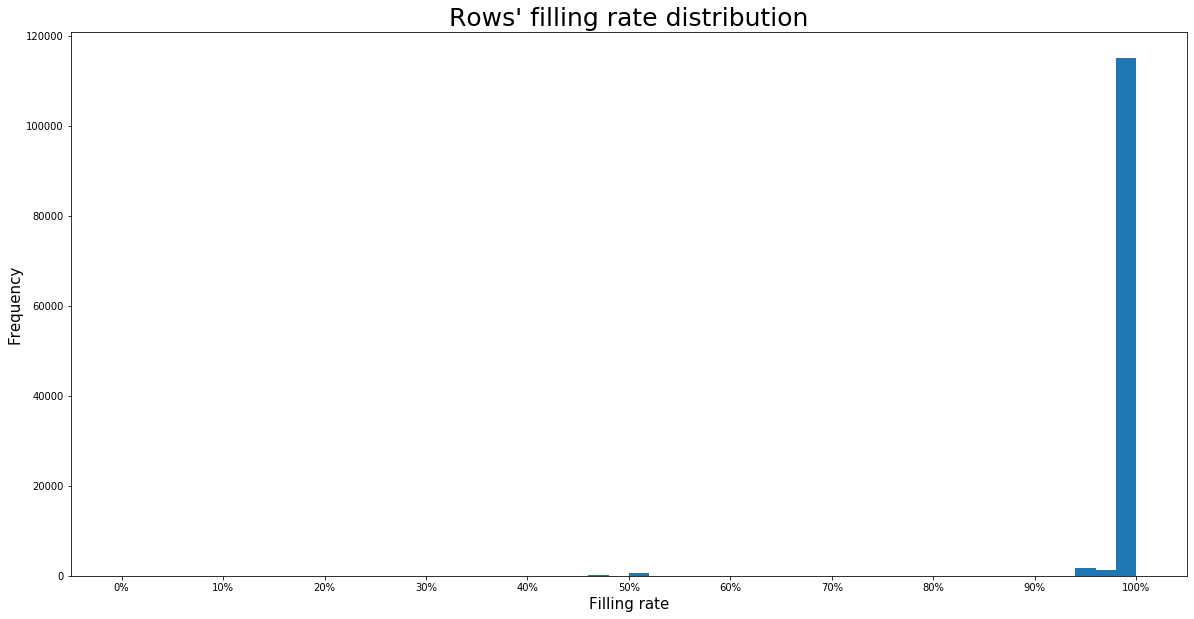

In [36]:
functions_p5.rows_fillingrate_histogram(data_items)

In [37]:
# %%flake8  # checking PEP8 compliance

data_items = functions_p5.fillingrate_filter_rows(data_items, 0.8)

Number of rows with a filling rate below 80.00%: 833 rows.


### **Imputation automatique** des valeurs manquantes

In [38]:
# %%flake8  # checking PEP8 compliance

# Displays the global filling rate of the DataFrame
functions_p5.global_filling_rate(data_items)

# Display filling rate and number of missing values for each feature
functions_p5.columns_filling_rate(data_items, missing_only=True)

DataFrame has 118318 rows and 44 columns.

Global filling rate of the DataFrame: 99.90%
Missing values in the DataFrame: 5058 (0.10%)

Number of rows with missing values: 3193 (2.70%)
Number of columns with missing values: 12 (27.27%)


,nb_values,missing_values,filling_rate
order_delivered_customer_date,115730.0,2588.0,0.978127
order_delivered_carrier_date,117064.0,1254.0,0.989401
customer_estim_lat,118001.0,317.0,0.997321
customer_estim_lng,118001.0,317.0,0.997321
seller_estim_lat,118053.0,265.0,0.997760
seller_estim_lng,118053.0,265.0,0.997760
product_category_name_english,118293.0,25.0,0.999789
order_approved_at,118303.0,15.0,0.999873
payment_sequential,118315.0,3.0,0.999975
payment_type,118315.0,3.0,0.999975


In [39]:
# %%flake8  # checking PEP8 compliance

# Proceed to column-wise imputations (based on dtypes)
data_items = functions_p5.smart_imputation(data_items)

# Inspect results of imputation
functions_p5.global_filling_rate(data_items)

# Display filling rate and number of missing values for each feature
functions_p5.columns_filling_rate(data_items, missing_only=True)

DataFrame has 118318 rows and 44 columns.

Global filling rate of the DataFrame: 99.93%
Missing values in the DataFrame: 3857 (0.07%)

Number of rows with missing values: 2604 (2.20%)
Number of columns with missing values: 3 (6.82%)


,nb_values,missing_values,filling_rate
order_delivered_customer_date,115730.0,2588.0,0.978127
order_delivered_carrier_date,117064.0,1254.0,0.989401
order_approved_at,118303.0,15.0,0.999873


### **Imputation manuelle** des valeurs manquantes résiduelles
Nous imputons les dernières dates manquantes avec le timestamp de la commande ('order_purchase_timestamp').

In [40]:
# %%flake8  # checking PEP8 compliance

# Imputing residual missing timestamps with 'order_purchase_timestamp'
for feature in data_items.columns:
    mask = data_items[feature].isnull()
    if mask.any():
        data_items.loc[mask, feature] = \
            data_items.loc[mask, 'order_purchase_timestamp']

# Inspect results of imputation
functions_p5.global_filling_rate(data_items)

DataFrame has 118318 rows and 44 columns.

Global filling rate of the DataFrame: 100.00%
Missing values in the DataFrame: 0 (0.00%)

Number of rows with missing values: 0 (0.00%)
Number of columns with missing values: 0 (0.00%)


### **Suppression** des lignes contenant des valeurs manquantes

In [41]:
# %%flake8  # checking PEP8 compliance

# Delete rows with missing values
nb_rows_before_dropping_missing = len(data_items)
mask = data_items.isnull().any(axis=1)
data_items = data_items[~mask]
print("Number of deleted rows:",
      nb_rows_before_dropping_missing - len(data_items))
print("Number of remaining rows:", len(data_items))

Number of deleted rows: 0
Number of remaining rows: 118318


# **Ingénierie des caractéristiques** par articles

In [42]:
data_items.shape

(118318, 44)

In [43]:
data_items.tail()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,seller_zip_code_prefix,seller_city,seller_state,customer_estim_lat,customer_estim_lng,seller_estim_lat,seller_estim_lng
119146,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP,6760e20addcf0121e9d58f2f1ff14298,delivered,2018-04-07 15:48:17,2018-04-07 16:08:45,2018-04-11 02:08:36,2018-04-13 20:06:37,2018-04-25,1.0,credit_card,6.0,88.779999,36e2cdbaa9f639b57c53b37ac798fee8,4.0,Recomendo,,2018-04-14,2018-04-28 11:15:04,1.0,ccb4503d9d43d245d3b295d0544f988b,527801b552d0077ffd170872eb49683b,2018-04-12 16:08:45,74.900002,13.880000,livros_interesse_geral,51.0,489.0,2.0,611.0,22.0,22.0,23.0,books_general_interest,17400.0,garca,SP,-23.586002,-46.499638,-22.211472,-49.658627
119147,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP,9ec0c8947d973db4f4e8dcf1fbfa8f1b,delivered,2018-04-04 08:20:22,2018-04-04 08:35:12,2018-04-05 18:42:35,2018-04-11 18:54:45,2018-04-20,1.0,credit_card,3.0,129.059998,b273b431c3aedb4eed18643309652940,5.0,,,2018-04-12,2018-04-16 10:36:05,1.0,9ede6b0570a75a4b9de4f383329f99ee,3fd1e727ba94cfe122d165e176ce7967,2018-04-10 08:35:12,114.900002,14.160000,esporte_lazer,51.0,1193.0,1.0,1211.0,25.0,24.0,22.0,sports_leisure,14802.0,araraquara,SP,-23.615829,-46.768532,-21.772226,-48.180222
119148,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE,fed4434add09a6f332ea398efd656a5c,delivered,2018-04-08 20:11:50,2018-04-08 20:30:03,2018-04-09 17:52:17,2018-05-09 19:03:15,2018-05-02,1.0,credit_card,5.0,56.040001,fa4f16891e6b2edd1354668d07f5648b,1.0,Chateada,Esperava qualidade no atendimento e estou tend...,2018-05-04,2018-05-08 01:41:07,1.0,7a5d2e1e131a860ae7d18f6fffa9d689,d9e7e7778b32987280a6f2cb9a39c57d,2018-04-12 20:30:03,37.000000,19.040001,beleza_saude,60.0,575.0,1.0,870.0,25.0,20.0,18.0,health_beauty,3304.0,sao paulo,SP,-3.734569,-38.510532,-23.545147,-46.578129
119149,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS,e31ec91cea1ecf97797787471f98a8c2,delivered,2017-11-03 21:08:33,2017-11-03 21:31:20,2017-11-06 18:24:41,2017-11-16 19:58:39,2017-12-05,1.0,credit_card,2.0,711.070007,0bcdc9e450ea500811a8d39ee993cd47,5.0,,,2017-11-17,2017-11-19 23:34:18,1.0,f819f0c84a64f02d3a5606ca95edd272,4869f7a5dfa277a7dca6462dcf3b52b2,2017-11-09 21:15:51,689.000000,22.070000,relogios_presentes,59.0,452.0,1.0,710.0,19.0,13.0,14.0,watches_gifts,14840.0,guariba,SP,-29.949839,-51.168495,-21.363503,-48.229599
119150,274fa6071e5e17fe303b9748641082c8,84732c5050c01db9b23e19ba39899398,6703,cotia,SP,28db69209a75e59f20ccbb5c36a20b90,delivered,2017-12-19 14:27:23,2017-12-19 18:50:39,2017-12-21 19:17:21,2017-12-26 18:42:36,2018-01-08,1.0,credit_card,1.0,21.770000,d95d701d062d2bb88041768a63aa750d,5.0,,"Produto chegou bem antes do prazo , gostei mui...",2017-12-27,2017-12-27 23:21:06,1.0,017692475c1c954ff597feda05131d73,3c7c4a49ec3c6550809089c6a2ca9370,2017-12-26 18:50:39,13.990000,7.780000,perfumaria,54.0,933.0,1.0,50.0,16.0,5.0,11.0,perfumery,3804.0,sao paulo,SP,-23.596733,-46.911995,-23.499144,-46.483299


## Variable 'volume du produit'

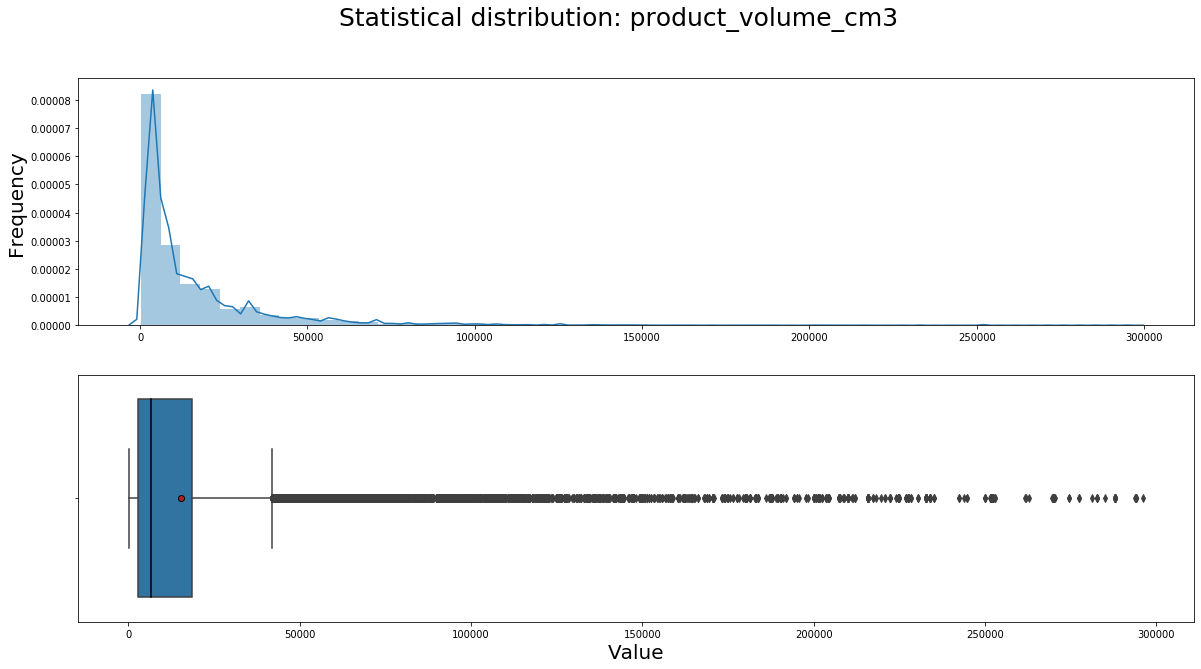

In [44]:
# %%flake8  # checking PEP8 compliance

# Adding a feature for the volume
data_items['product_volume_cm3'] = \
    data_items['product_length_cm'] *\
    data_items['product_height_cm'] *\
    data_items['product_width_cm']

fig = functions_p5.empirical_distribution(data_items, 'product_volume_cm3')
fig.savefig('plots/product_volume.png')

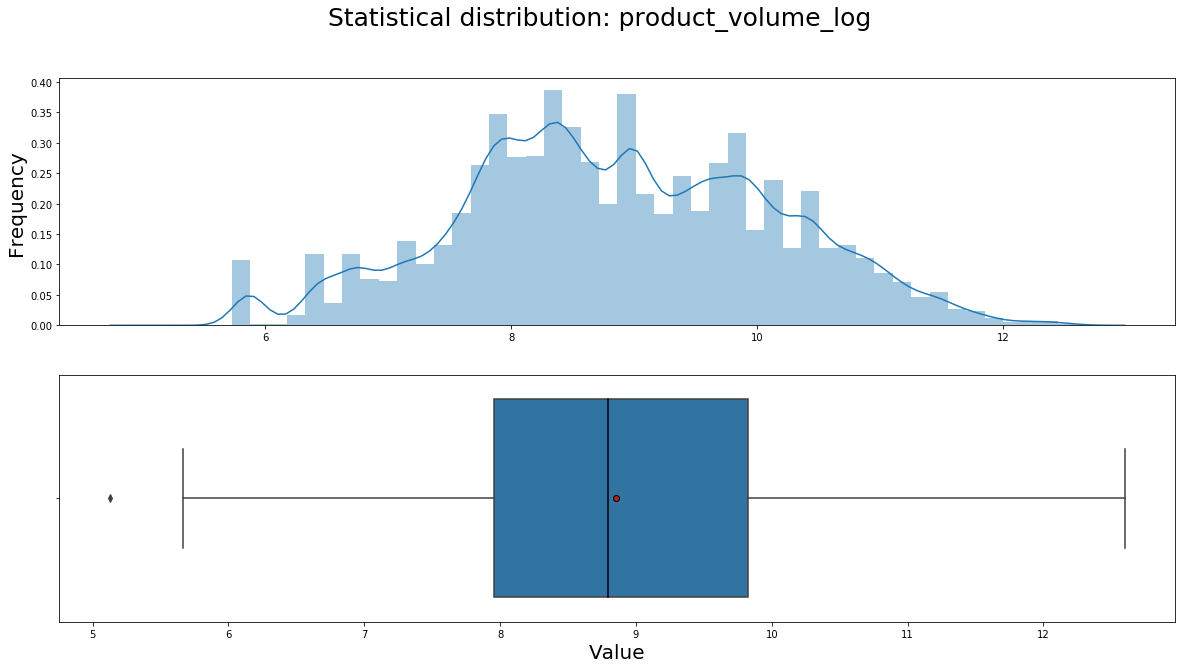

In [45]:
# %%flake8  # checking PEP8 compliance

# Logarithmization of the product volume
data_items['product_volume_log'] = np.log(data_items['product_volume_cm3'] + 1)
fig = functions_p5.empirical_distribution(data_items, 'product_volume_log')
fig.savefig('plots/product_volume_log.png')

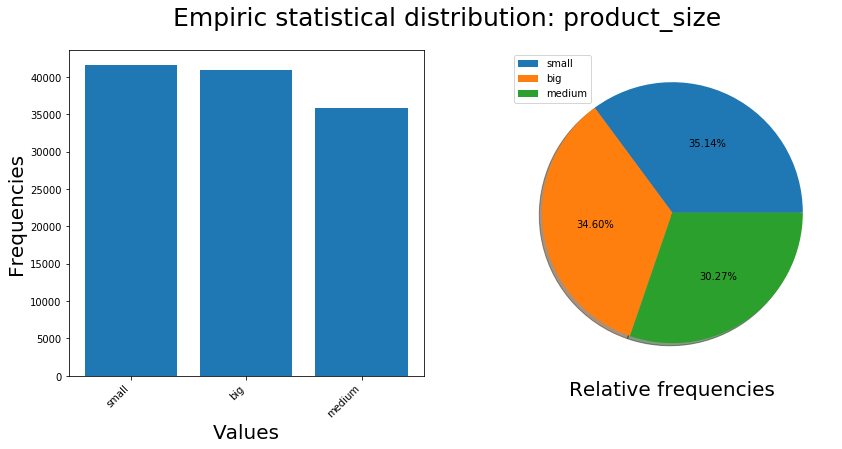

In [46]:
# %%flake8  # checking PEP8 compliance

# Binning the product by size
data_items['product_size'] = pd.cut(data_items['product_volume_cm3'],
                                    bins=[0, 4000, 12000, 1000000],
                                    labels=['small', 'medium', 'big'])

# Display results
fig = functions_p5.categorical_distribution(data_items,
                                            'product_size')
fig.savefig('plots/product_size.png')

## Logarithmisation de la variable poids du produit

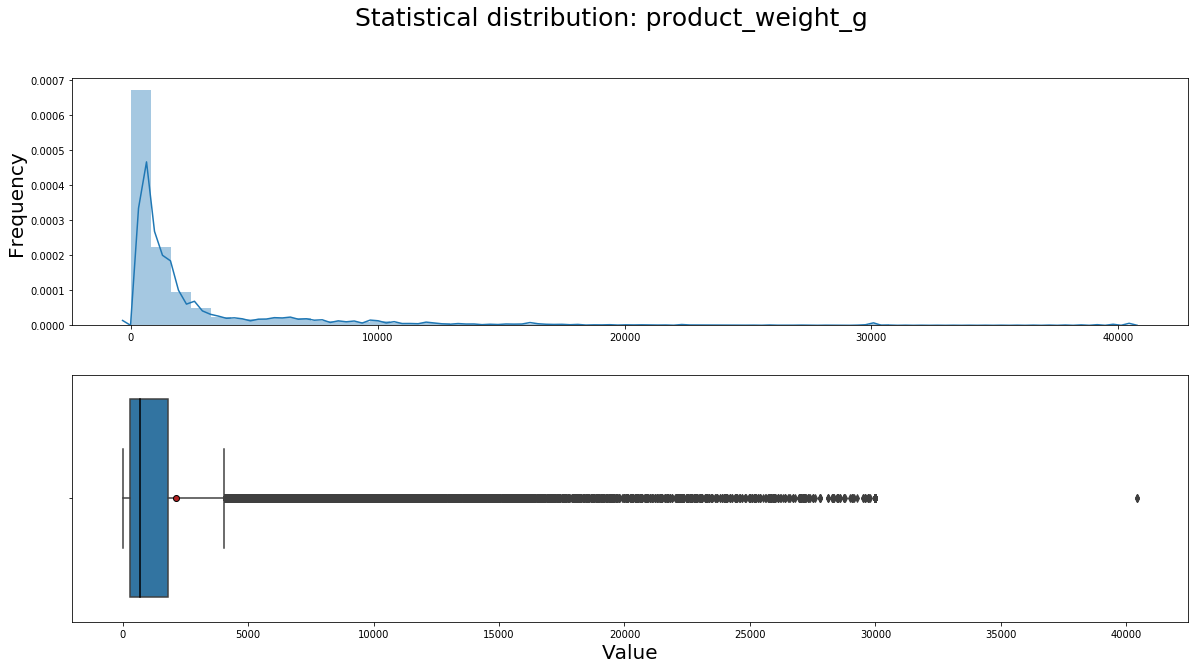

In [47]:
# %%flake8  # checking PEP8 compliance

fig = functions_p5.empirical_distribution(data_items, 'product_weight_g')
fig.savefig('plots/product_weight.png')

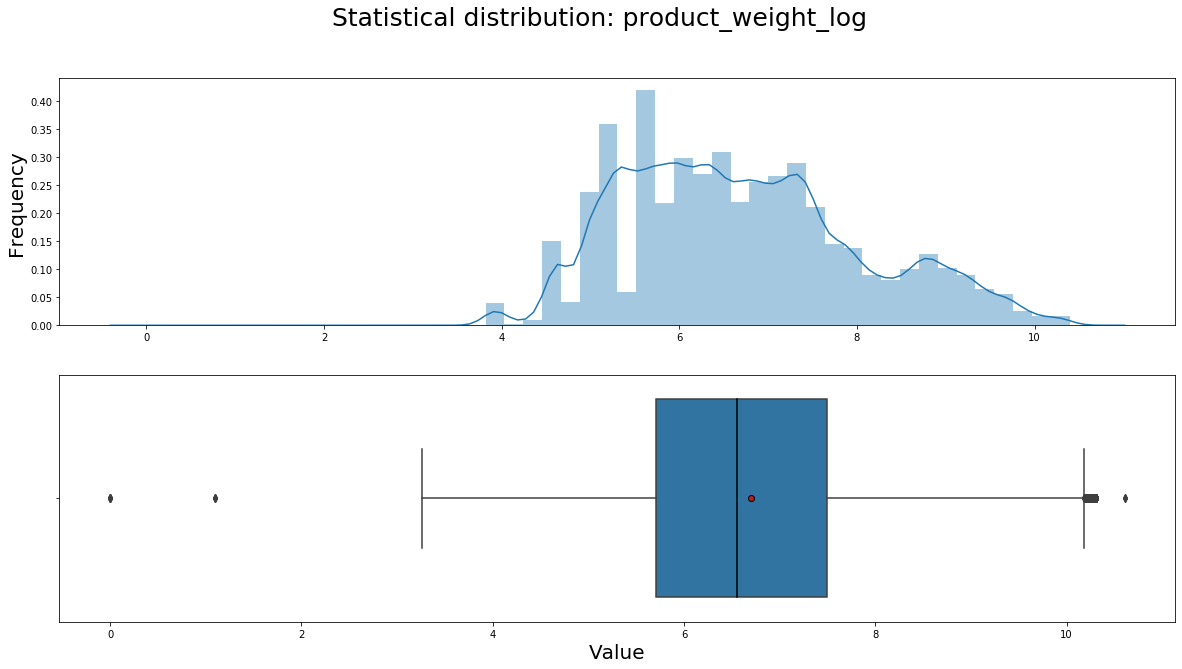

In [48]:
# %%flake8  # checking PEP8 compliance

# Logarithmization of the product volume
data_items['product_weight_log'] = np.log(data_items['product_weight_g'] + 1)
fig = functions_p5.empirical_distribution(data_items, 'product_weight_log')
fig.savefig('plots/product_weight_log.png')

## Variable prix total (prix + frais de port)

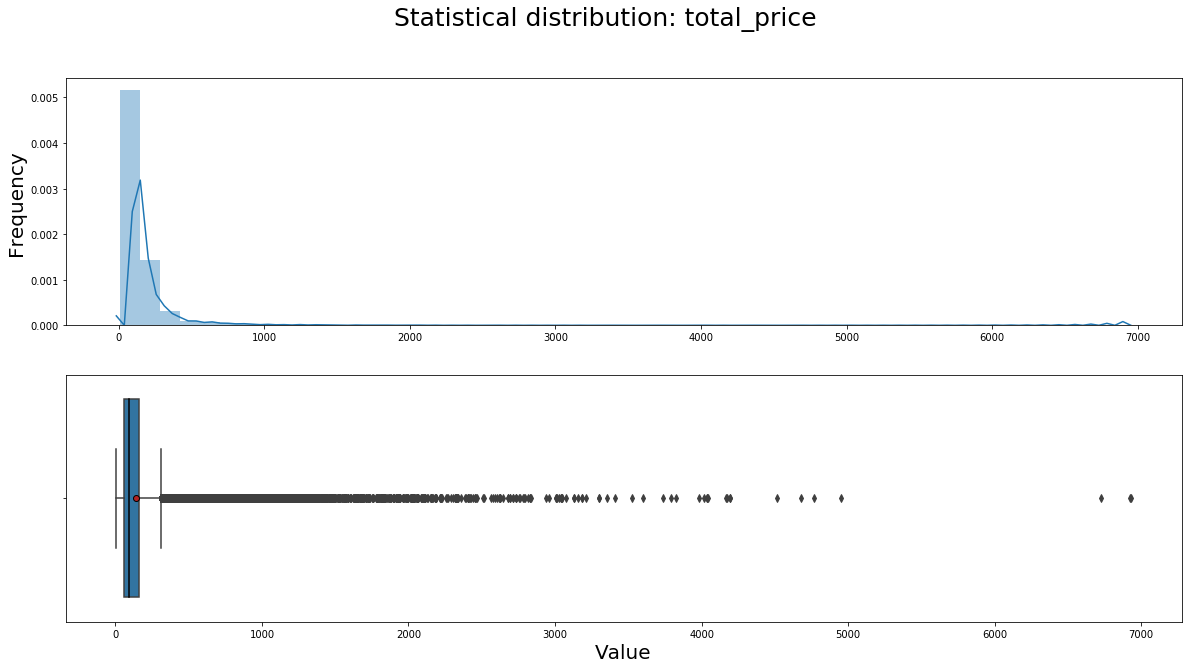

In [49]:
# %%flake8  # checking PEP8 compliance

data_items['total_price'] = data_items['price'] + data_items['freight_value']

fig = functions_p5.empirical_distribution(data_items, 'total_price')
fig.savefig('plots/total_price.png')

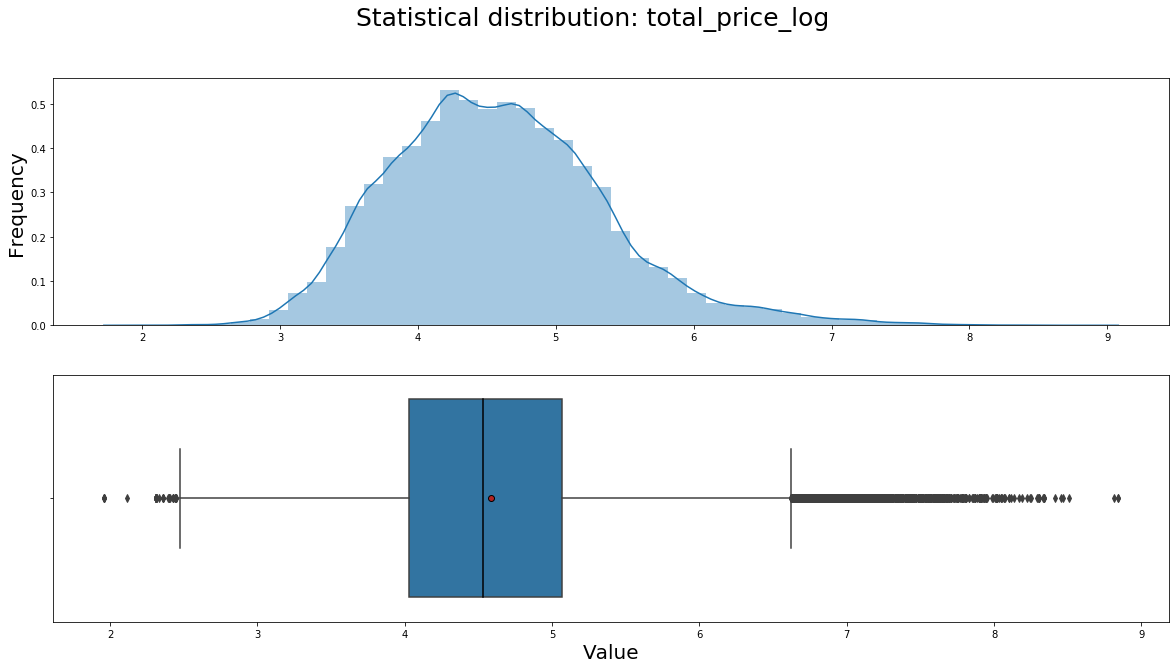

In [50]:
# %%flake8  # checking PEP8 compliance

# Logarithmization of the product volume
data_items['total_price_log'] = np.log(data_items['total_price'] + 1)
fig = functions_p5.empirical_distribution(data_items, 'total_price_log')
fig.savefig('plots/total_price_log.png')

## Binarisation du titre de commentaire

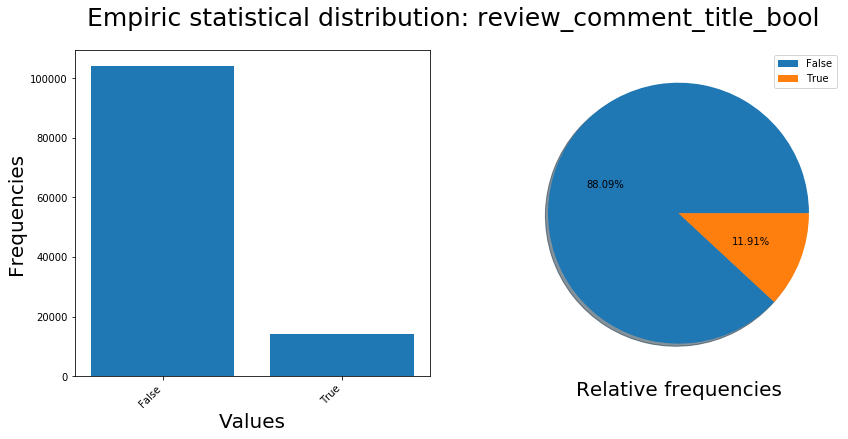

In [51]:
# %%flake8  # checking PEP8 compliance

# Convert 'review_comment_title' as boolean feature
data_items['review_comment_title_bool'] = \
    (data_items['review_comment_title'] != '')

# Display results
fig = functions_p5.categorical_distribution(
    data_items,
    'review_comment_title_bool')
fig.savefig('plots/review_comment_title.png')

## Binarisation du message de commentaire

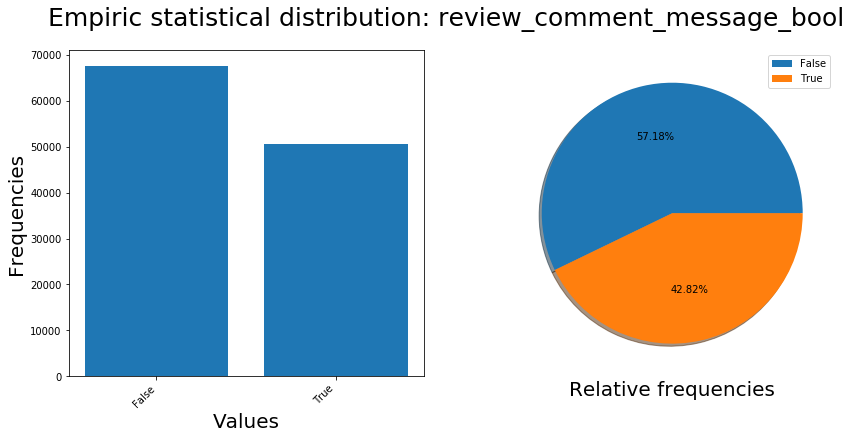

In [52]:
# %%flake8  # checking PEP8 compliance

# Convert 'review_comment_title' as boolean feature
data_items['review_comment_message_bool'] = \
    (data_items['review_comment_message'] != '')

# Display results
fig = functions_p5.categorical_distribution(
    data_items,
    'review_comment_message_bool')
fig.savefig('plots/review_comment_message.png')

## Binarisation du nombre de moyen de paiements utilisés

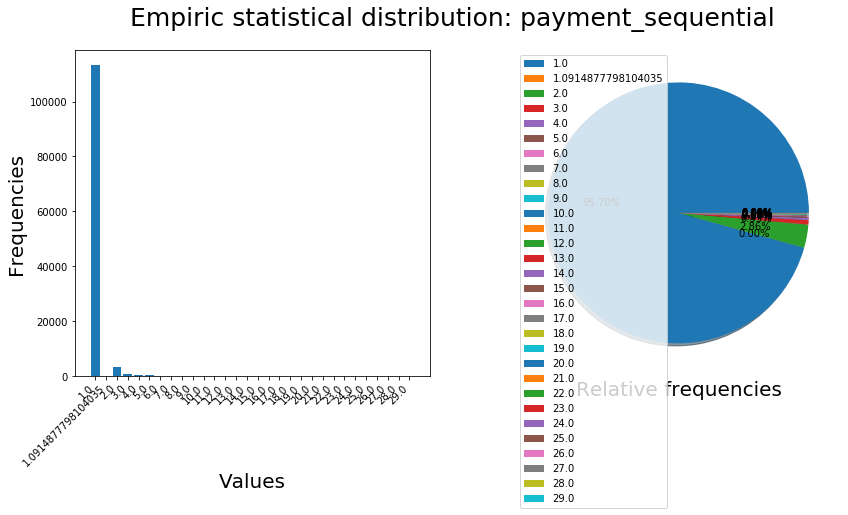

In [53]:
# %%flake8  # checking PEP8 compliance

fig = functions_p5.categorical_distribution(
    data_items,
    'payment_sequential',
    ordinal=True)
fig.savefig('plots/payment_sequential.png')

In [54]:
# %%flake8  # checking PEP8 compliance

# Converting 'payment_sequential' as a boolean feature 'payment_sequential'
data_items['single_payment_sequential'] =\
    (data_items['payment_sequential'] == 1)

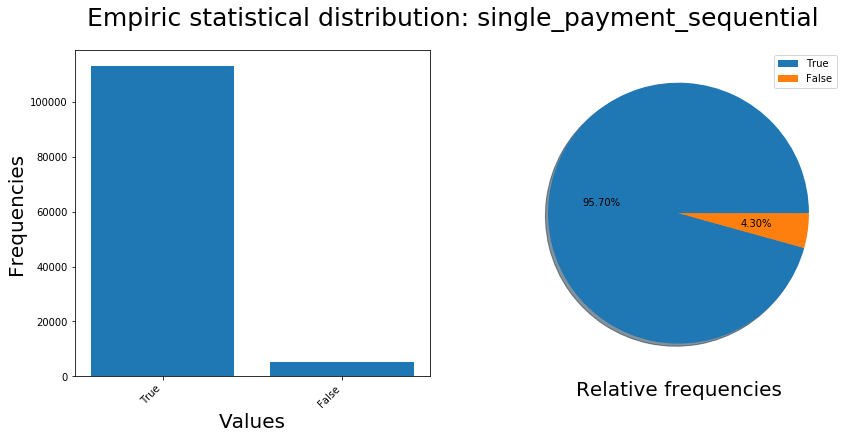

In [55]:
# %%flake8  # checking PEP8 compliance

dataframe = data_items
feature = 'single_payment_sequential'

fig = functions_p5.categorical_distribution(dataframe, feature)
fig.savefig('plots/single_payment_sequential.png')

## Binarisation du statut 'livré' de la commande

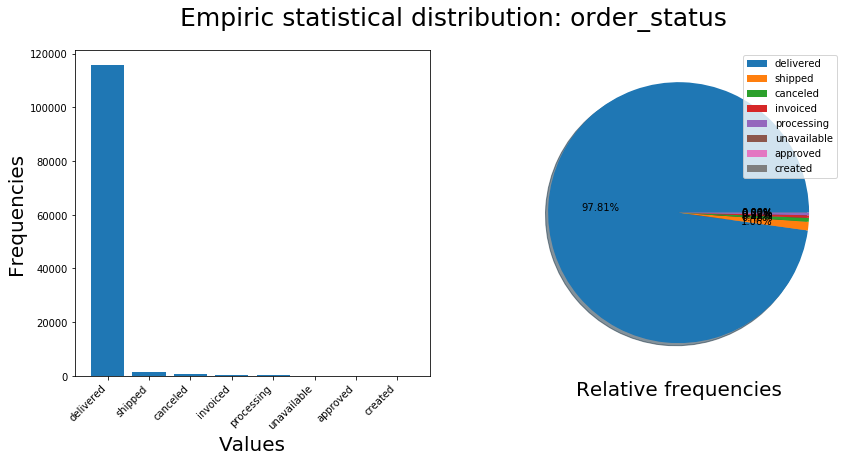

In [56]:
dataframe = data_items
feature = 'order_status'

fig = functions_p5.categorical_distribution(dataframe, feature)
fig.savefig('plots/order_status.png')

In [57]:
# %%flake8  # checking PEP8 compliance

# Converting the column 'order_status' as a boolean feature 'order_delivered'
data_items['order_delivered'] = (data_items['order_status'] == 'delivered')

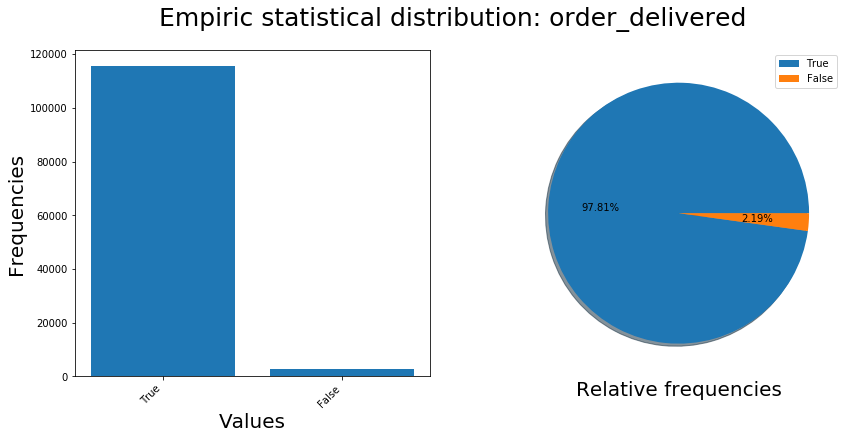

In [58]:
# %%flake8  # checking PEP8 compliance

fig = functions_p5.categorical_distribution(data_items, 'order_delivered')
fig.savefig('plots/order_delivered.png')

## Binarisation du paiement par carte de crédit

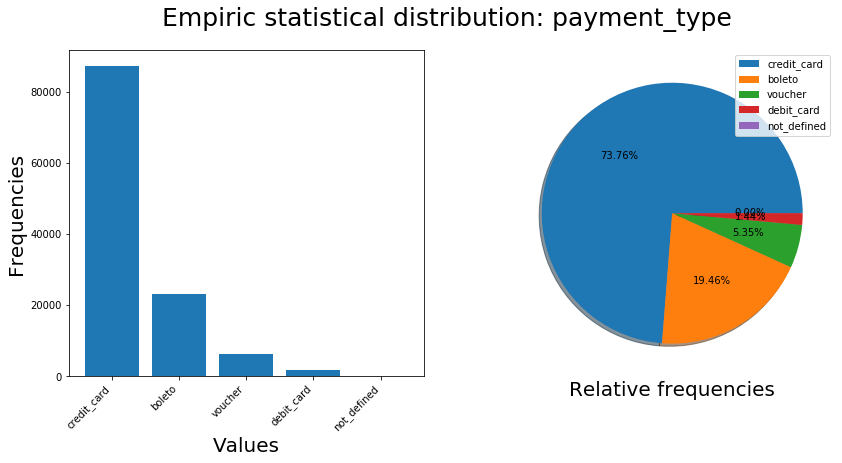

In [59]:
fig = functions_p5.categorical_distribution(data_items, 'payment_type')
fig.savefig('plots/payment_type.png')

In [60]:
# %%flake8  # checking PEP8 compliance

# Converting the column 'payment_type' as a boolean feature 'paid_credit_card'
data_items['paid_credit_card'] = (data_items['payment_type'] == 'credit_card')

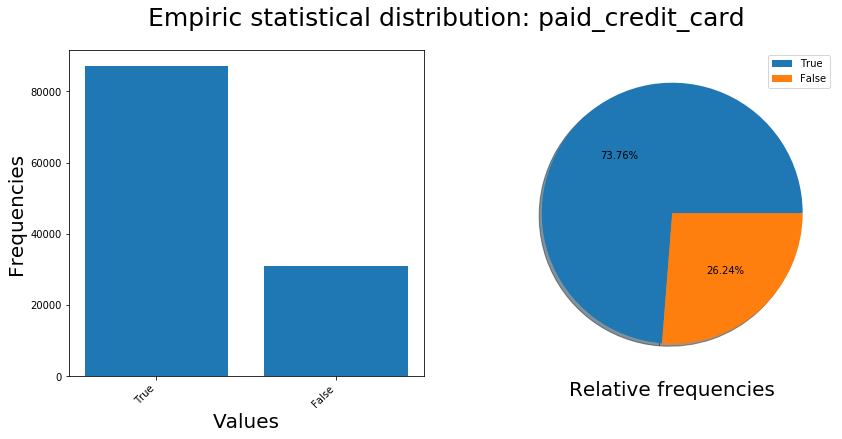

In [61]:
fig = functions_p5.categorical_distribution(data_items, 'paid_credit_card')
fig.savefig('plots/payment_credit_card.png')

## Binarisation du 'paiement comptant'

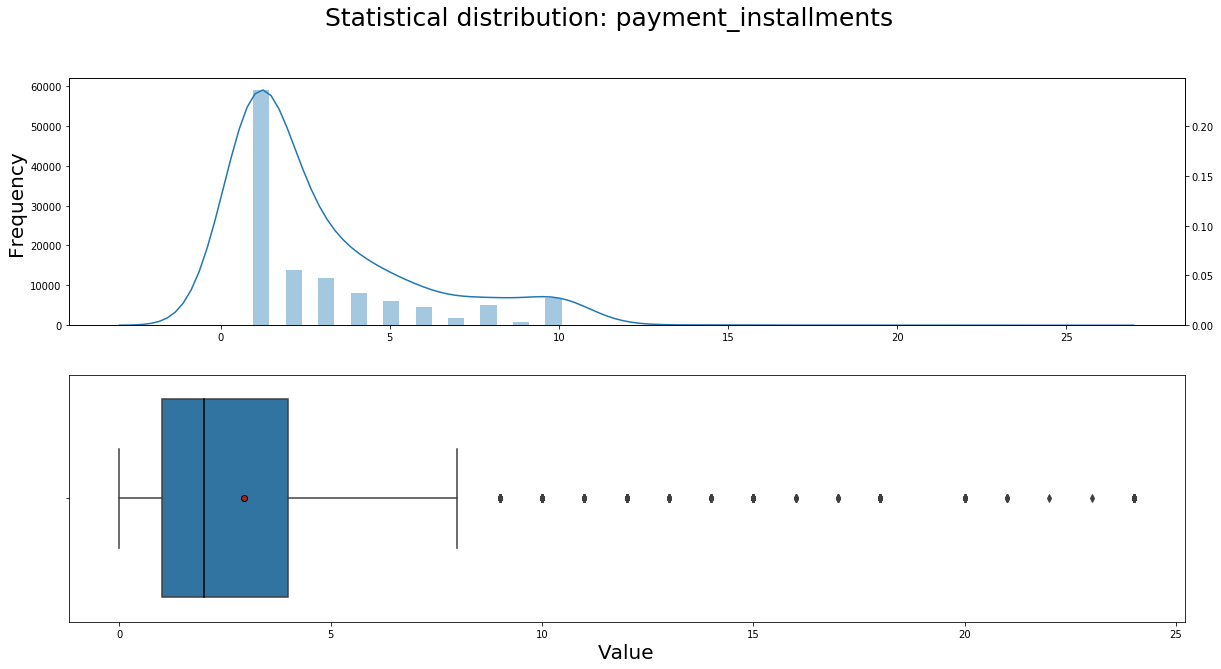

In [62]:
fig = functions_p5.discrete_distribution(data_items, 'payment_installments')
fig.savefig('plots/payment_installments.png')

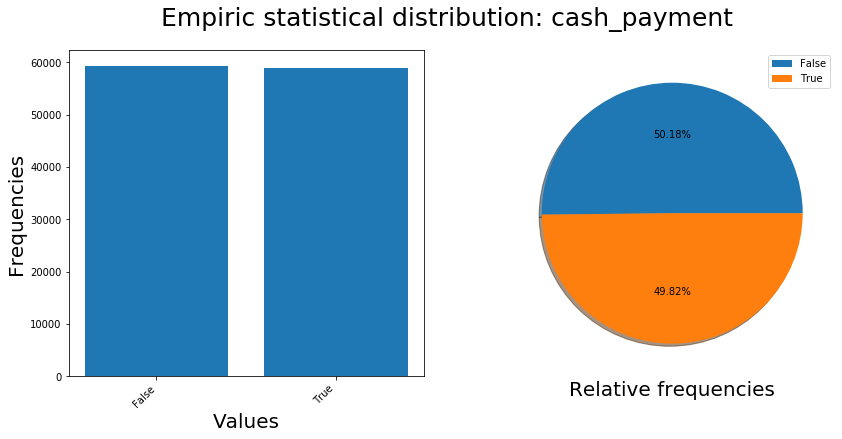

In [63]:
# Converting the column 'payment_type' as a boolean feature 'paid_credit_card'
data_items['cash_payment'] = (data_items['payment_installments'] == 1)

# Display results
fig = functions_p5.categorical_distribution(data_items, 'cash_payment')
fig.savefig('plots/cash_payment.png')

## Variables délai de commentaire et délai de livraison

In [64]:
# %%flake8  # checking PEP8 compliance
import pandas as pd
from datetime import timedelta

# Adding a column 'review period after delivery'
data_items['review period'] = \
    pd.to_timedelta(data_items['review_answer_timestamp']
                    - data_items['order_delivered_customer_date'])

In [65]:
# %%flake8  # checking PEP8 compliance

# Adding a column for 'delivery period'
data_items['delivery period'] = \
    pd.to_timedelta(
        data_items['order_delivered_customer_date']
        - data_items['order_purchase_timestamp'])

## Création d'une variable distance client-vendeur

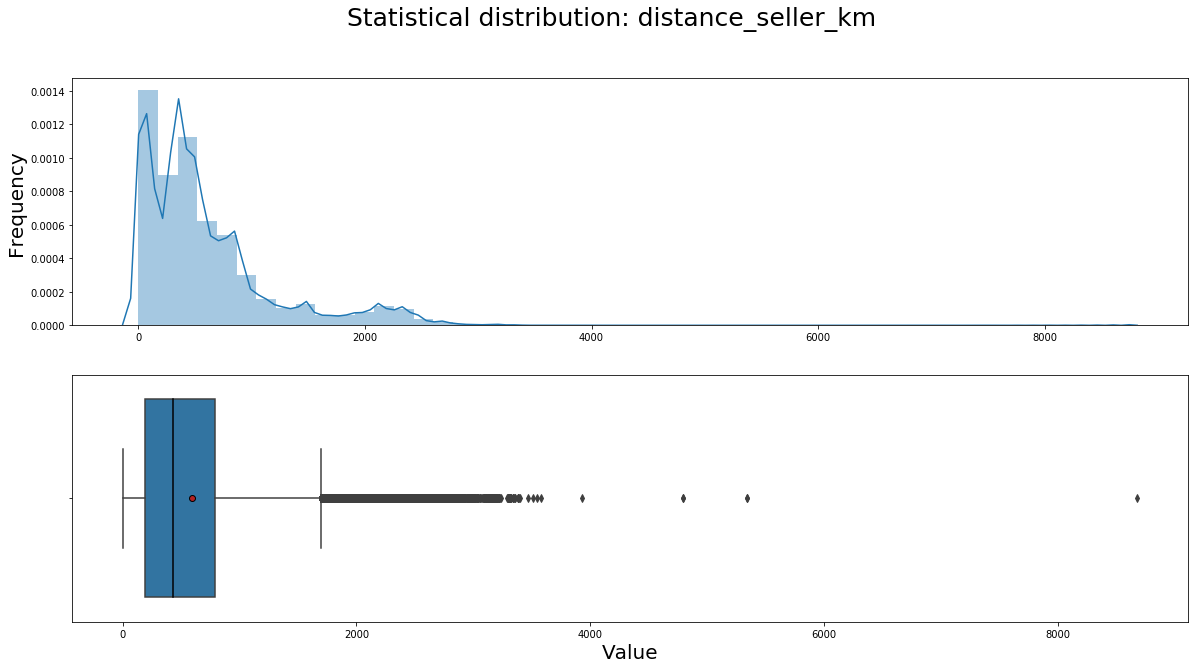

In [66]:
# %%flake8  # checking PEP8 compliance

def distance_from_coordinates(coord_A, coord_B):
    """latitude (phi) : N/S and longitude (lambda): E/W"""

    import math

    # unpack coordinates in degrees
    (lat_A, lng_A), (lat_B, lng_B) = coord_A, coord_B

    # conversion in radians
    lat_A = math.radians(lat_A)
    lng_A = math.radians(lng_A)
    lat_B = math.radians(lat_B)
    lng_B = math.radians(lng_B)

    # angular distance (in radians), using spherical trigonometry relation
    S_ab = math.acos(
        math.sin(lat_A)*math.sin(lat_B)
        + math.cos(lat_A)*math.cos(lat_B)*math.cos(lng_B-lng_A)
    )

    # Earth radius (in kilometers)
    R_earth = 6371

    # distance (in kilometers)
    distance = S_ab*R_earth

    return distance


def distance_to_seller(row):
    coordinates_customer = (
        row['customer_estim_lat'],
        row['customer_estim_lng'],
    )
    coordinates_seller = (
        row['seller_estim_lat'],
        row['seller_estim_lng'],
    )
    return distance_from_coordinates(coordinates_customer, coordinates_seller)


# Compute the distance for each item
data_items['distance_seller_km'] = data_items.apply(distance_to_seller, axis=1)

# Display results
fig = functions_p5.empirical_distribution(data_items, 'distance_seller_km')
fig.savefig('plots/distance_seller_km.png')

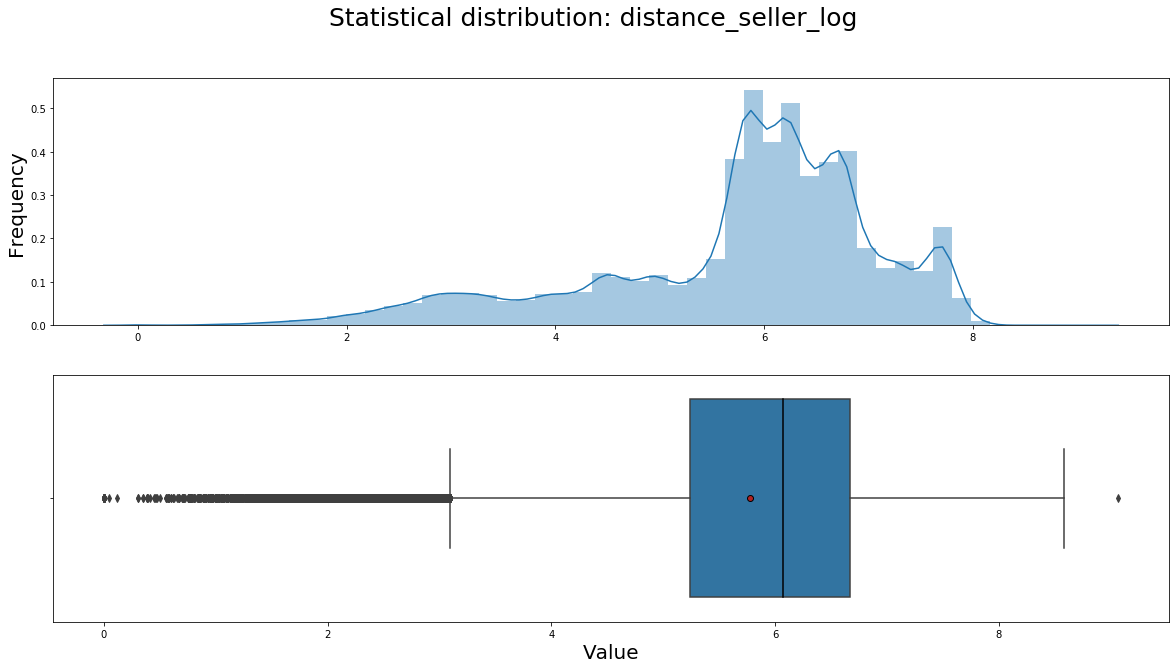

In [67]:
# %%flake8  # checking PEP8 compliance

# Logarithmization of the distance to seller
data_items['distance_seller_log'] = \
    np.log(data_items['distance_seller_km'] + 1)

# Display results
fig = functions_p5.empirical_distribution(
    data_items,
    'distance_seller_log'
)
fig.savefig('plots/distance_seller_log.png')

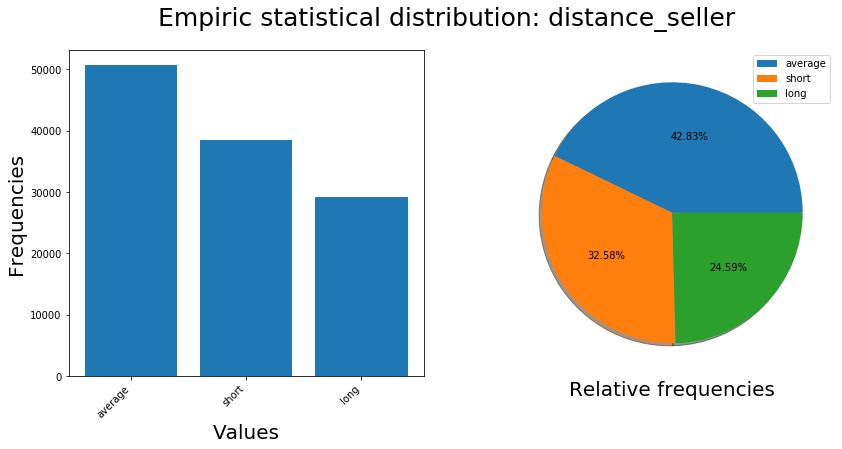

In [68]:
# %%flake8  # checking PEP8 compliance

# Binning the product by size
data_items['distance_seller'] = pd.cut(
    data_items['distance_seller_km'],
    bins=[0, 300, 800, 10000],
    labels=['short', 'average', 'long']
)

# Display results
fig = functions_p5.categorical_distribution(data_items, 'distance_seller')
fig.savefig('plots/distance_seller.png')

## Création d'une variable 'Saison'

In [69]:
# %%flake8  # checking PEP8 compliance

# Get the quarter
data_items['order_season'] = data_items['order_purchase_timestamp'].dt.quarter

# Remap quarters with season
seasons_dict = {1: 'winter', 2: 'spring', 3: 'summer', 4: 'automn'}
data_items['order_season'] = data_items['order_season'].replace(seasons_dict)
data_items['order_season'] = data_items['order_season'].astype('category')

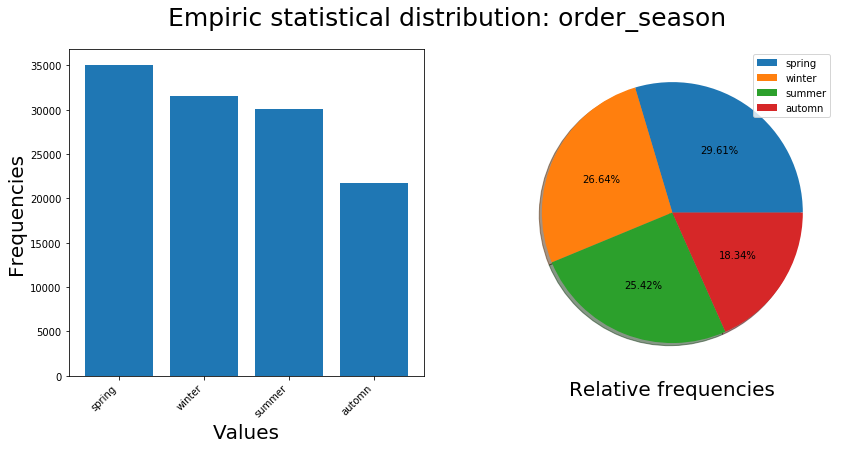

In [70]:
dataframe = data_items
feature = 'order_season'

fig = functions_p5.categorical_distribution(dataframe, feature)
fig.savefig('plots/order_season.png')

## **Regroupement** des catégories de produit

In [71]:
# Reload importation of module
import importlib
importlib.reload(functions_p5)

<module 'functions.functions_p5' from 'D:\\OneDrive\\OpenClassrooms\\Parcours Data Scientist\\projet5\\functions\\functions_p5.py'>

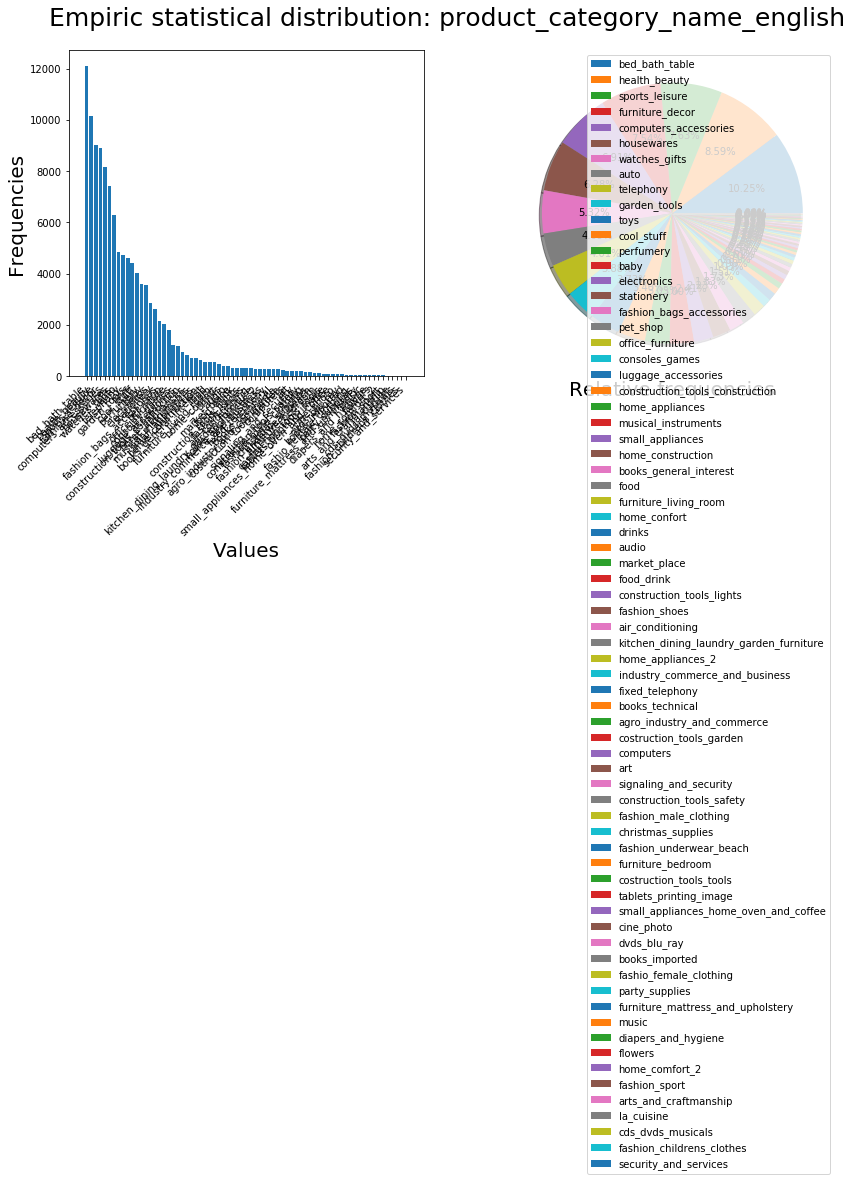

In [72]:
# Display results
fig = functions_p5.categorical_distribution(data_items, 'product_category_name_english')
fig.savefig('plots/roduct_category_name.png')

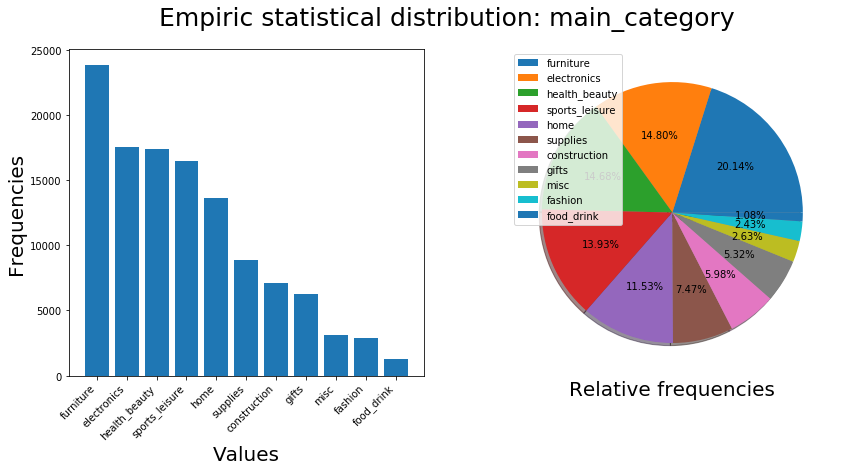

In [73]:
# %%flake8  # checking PEP8 compliance

product_categories_dict = {
    'construction_tools_construction': 'construction',
    'construction_tools_lights': 'construction',
    'construction_tools_safety': 'construction',
    'costruction_tools_garden': 'construction',
    'costruction_tools_tools': 'construction',
    'garden_tools': 'construction',
    'home_construction': 'construction',

    'fashio_female_clothing': 'fashion',
    'fashion_bags_accessories': 'fashion',
    'fashion_childrens_clothes': 'fashion',
    'fashion_male_clothing': 'fashion',
    'fashion_shoes': 'fashion',
    'fashion_sport': 'fashion',
    'fashion_underwear_beach': 'fashion',

    'furniture_bedroom': 'furniture',
    'furniture_decor': 'furniture',
    'furniture_living_room': 'furniture',
    'furniture_mattress_and_upholstery': 'furniture',
    'bed_bath_table': 'furniture',
    'kitchen_dining_laundry_garden_furniture': 'furniture',
    'office_furniture': 'furniture',

    'home_appliances': 'home',
    'home_appliances_2': 'home',
    'home_comfort_2': 'home',
    'home_confort': 'home',
    'air_conditioning': 'home',
    'housewares': 'home',
    'art': 'home',
    'arts_and_craftmanship': 'home',
    'flowers': 'home',
    'cool_stuff': 'home',

    'drinks': 'food_drink',
    'food': 'food_drink',
    'food_drink': 'food_drink',
    'la_cuisine': 'food_drink',

    'electronics': 'electronics',
    'audio': 'electronics',
    'tablets_printing_image': 'electronics',
    'telephony': 'electronics',
    'fixed_telephony': 'electronics',
    'small_appliances': 'electronics',
    'small_appliances_home_oven_and_coffee': 'electronics',
    'computers_accessories': 'electronics',
    'computers': 'electronics',

    'sports_leisure': 'sports_leisure',
    'consoles_games': 'sports_leisure',
    'musical_instruments': 'sports_leisure',
    'toys': 'sports_leisure',
    'cine_photo': 'sports_leisure',
    'dvds_blu_ray': 'sports_leisure',
    'cds_dvds_musicals': 'sports_leisure',
    'music': 'sports_leisure',
    'books_general_interest': 'sports_leisure',
    'books_imported': 'sports_leisure',
    'books_technical': 'sports_leisure',

    'health_beauty': 'health_beauty',
    'perfumery': 'health_beauty',
    'diapers_and_hygiene': 'health_beauty',
    'baby': 'health_beauty',

    'christmas_supplies': 'supplies',
    'stationery': 'supplies',
    'party_supplies': 'supplies',
    'auto': 'supplies',
    'luggage_accessories': 'supplies',

    'watches_gifts': 'gifts',

    'agro_industry_and_commerce': 'misc',
    'industry_commerce_and_business': 'misc',
    'security_and_services': 'misc',
    'signaling_and_security': 'misc',
    'market_place': 'misc',
    'pet_shop': 'misc',
}

# Remap category to main category
data_items['main_category'] = \
    data_items['product_category_name_english']\
    .replace(product_categories_dict)

# Display results
fig = functions_p5.categorical_distribution(data_items, 'main_category')
fig.savefig('plots/main_category.png')

## **Sauvegarde** de la table *'data_items'*

In [74]:
# Display head of data
display(data_items.head(2))

# Save the file (text type)
data_items.to_csv("data\cleaned\p5_data_items.csv", index=False)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,seller_zip_code_prefix,seller_city,seller_state,customer_estim_lat,customer_estim_lng,seller_estim_lat,seller_estim_lng,product_volume_cm3,product_volume_log,product_size,product_weight_log,total_price,total_price_log,review_comment_title_bool,review_comment_message_bool,single_payment_sequential,order_delivered,paid_credit_card,cash_payment,review period,delivery period,distance_seller_km,distance_seller_log,distance_seller,order_season,main_category
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05,1.0,credit_card,2.0,146.869995,88b8b52d46df026a9d1ad2136a59b30b,4.0,,,2017-05-26,2017-05-30 22:34:40,1.0,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.989998,21.879999,moveis_escritorio,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,office_furniture,8577.0,itaquaquecetuba,SP,-20.498489,-47.396931,-23.486111,-46.366722,107136.0,11.581864,big,9.069238,146.869997,4.996333,False,False,True,True,True,False,5 days 11:59:05,8 days 19:30:00,348.770504,5.857277,average,spring,furniture
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06,1.0,credit_card,8.0,335.480011,02fc48a9efa3e3d0f1a8ea26507eeec3,5.0,,,2018-01-30,2018-02-10 22:43:29,1.0,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-01-18 20:58:32,289.000000,46.480000,utilidades_domesticas,43.0,1002.0,3.0,10150.0,89.0,15.0,40.0,housewares,88303.0,itajai,SC,-23.727993,-46.542847,-26.912575,-48.673981,53400.0,10.885585,big,9.225328,335.480000,5.818539,False,False,True,True,True,False,12 days 10:02:10,16 days 15:52:55,413.831857,6.027873,average,winter,home


# **Aggrégations par clients** (*groupby*)

## Aggrégation

In [75]:
# %%flake8  # checking PEP8 compliance

# Creating the groupby object by 'customer_unique_id'
data_gb_customers = data_items.groupby(by='customer_unique_id')

# Initializing the data about customers
data_customers = dict_df['olist_customers_dataset']

# Converting 'customer_city' and 'customer_state'
data_customers['customer_city'] = \
    data_customers['customer_city'].astype('category')
data_customers['customer_state'] = \
    data_customers['customer_state'].astype('category')

In [76]:
# %%flake8  # checking PEP8 compliance

# defining aggregation function for boolean columns
def agg_bool2(x): return (x == True).sum()

In [77]:
# %%flake8  # checking PEP8 compliance

def customers_aggregation(data_customers):
    features_to_add = []

    # Add a feature : total number of items (groupby customers)
    features_to_add.append(data_gb_customers
                           .size()
                           .rename('nb_purchased_items'))

    # Add a feature : total of different products ordered (groupby customers)
    features_to_add.append(data_gb_customers['product_id']
                           .nunique()
                           .rename('nb_distinct_products'))

    # Add a feature : number of orders (groupby customers)
    features_to_add.append(data_gb_customers['order_id']
                           .nunique()
                           .rename('nb_orders'))

    # Add a feature : total of prices (groupby customers)
    features_to_add.append(data_gb_customers['price']
                           .sum()
                           .rename('sum_prices'))

    # Add a feature : mean of logarithmized total prices (groupby customers)
    features_to_add.append(data_gb_customers['total_price_log']
                           .mean()
                           .rename('mean_price_log'))

    # Add a feature : sum of the freight values (groupby customers)
    features_to_add.append(data_gb_customers['freight_value']
                           .sum()
                           .rename('sum_freight_values'))

    # Add a feature : sum of payment_value (groupby customers)
    features_to_add.append(data_gb_customers['payment_value']
                           .sum()
                           .rename('sum_payments'))

    # Add a feature : mean payment installments (groupby customers)
    features_to_add.append(data_gb_customers['payment_installments']
                           .mean()
                           .rename('mean_payment_installments'))

    # Add a feature : number of reviews (groupby customers)
    features_to_add.append(data_gb_customers['review_id']
                           .nunique()
                           .rename('nb_reviews'))

    # Add a feature : mean score for reviews (groupby customers)
    features_to_add.append(data_gb_customers['review_score']
                           .mean()
                           .rename('mean_review_score'))

    # Add a feature : count of reviews comments (groupby customers)
    features_to_add.append(data_gb_customers['review_comment_title_bool']
                           .count()
                           .rename('count_review_comments'))

    # Add a feature : count of reviews titles (groupby customers)
    features_to_add.append(data_gb_customers['review_comment_title_bool']
                           .count()
                           .rename('count_review_titles'))

    # Add a feature : first order date (groupby customers)
    features_to_add.append(data_gb_customers['order_purchase_timestamp']
                           .min()
                           .rename('first_order_purchase_timestamp'))

    # Add a feature : last order date (groupby customers)
    features_to_add.append(data_gb_customers['order_purchase_timestamp']
                           .max()
                           .rename('last_order_purchase_timestamp'))

    # Adding a feature for 'mean_distance_seller_log'
    features_to_add.append(data_gb_customers['distance_seller_log']
                           .mean()
                           .rename('mean_distance_seller_log'))

    # Adding a feature for 'mean_distance_seller_km'
    features_to_add.append(data_gb_customers['distance_seller_km']
                           .mean()
                           .rename('mean_distance_seller_km'))

    # Adding a feature for 'mean_product_volume_log'
    features_to_add.append(data_gb_customers['product_volume_log']
                           .mean()
                           .rename('mean_product_volume_log'))

    # Adding a feature for 'mean_product_volume_cm3'
    features_to_add.append(data_gb_customers['product_volume_cm3']
                           .mean()
                           .rename('mean_product_volume_cm3'))

    # Adding a feature for 'mean_product_weight_log'
    features_to_add.append(data_gb_customers['product_weight_log']
                           .mean()
                           .rename('mean_product_weight_log'))

    # Adding a feature for 'mean_product_weight_g'
    features_to_add.append(data_gb_customers['product_weight_g']
                           .mean()
                           .rename('mean_product_weight_g'))

    # Adding a feature 'cash_payment_percentage'
    features_to_add.append((data_gb_customers['cash_payment']
                           .agg(agg_bool2)
                           / data_gb_customers.size())
                           .rename('cash_payment_percent'))

    # Adding a feature 'credit_card_percentage'
    features_to_add.append((data_gb_customers['paid_credit_card']
                           .agg(agg_bool2)
                           / data_gb_customers.size())
                           .rename('credit_card_percent'))

    # Adding a feature 'single_payment_sequential_percentage'
    features_to_add.append((data_gb_customers['single_payment_sequential']
                           .agg(agg_bool2)
                           / data_gb_customers.size())
                           .rename('single_paym_seq_percent'))

    # -----------------------------------------------
    # Merging the new features to the DataFrame
    for feature_series in features_to_add:
        data_customers = pd.merge(
            data_customers,
            feature_series,
            on='customer_unique_id')

    return data_customers


data_customers = customers_aggregation(data_customers)

## Variables multi-fréquentielles

In [78]:
# %%flake8  # checking PEP8 compliance


# defining aggregation function for strings (returns set of values)
def agg_str(x): return [x.loc[row_id] for row_id in x.index]


features_to_add = []

# Adding a feature for 'product_categories'
features_to_add.append(
    data_gb_customers['product_category_name_english']
    .agg(agg_str)
    .rename('product_categories'))

# Adding a feature for 'payment_types'
features_to_add.append(data_gb_customers['payment_type'].agg(agg_str)
                       .rename('payment_types'))

# Adding a feature for 'order_seasons'
features_to_add.append(data_gb_customers['order_season'].agg(agg_str)
                       .rename('order_seasons'))

# Adding a feature for 'product_main_categories'
features_to_add.append(data_gb_customers['main_category'].agg(agg_str)
                       .rename('product_main_categories'))

# Merging the new features to the DataFrame
for feature_series in features_to_add:
    data_customers = pd.merge(
        data_customers,
        feature_series,
        on='customer_unique_id'
    )

data_customers.tail()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,nb_purchased_items,nb_distinct_products,nb_orders,sum_prices,mean_price_log,sum_freight_values,sum_payments,mean_payment_installments,nb_reviews,mean_review_score,count_review_comments,count_review_titles,first_order_purchase_timestamp,last_order_purchase_timestamp,mean_distance_seller_log,mean_distance_seller_km,mean_product_volume_log,mean_product_volume_cm3,mean_product_weight_log,mean_product_weight_g,cash_payment_percent,credit_card_percent,single_paym_seq_percent,product_categories,payment_types,order_seasons,product_main_categories
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP,1,1,1,74.900002,4.497362,13.880000,88.779999,6.0,1,4.0,1,1,2018-04-07 15:48:17,2018-04-07 15:48:17,5.882894,357.846086,9.317669,11132.0,6.416732,611.0,0.0,1.0,1.0,[books_general_interest],[credit_card],[spring],[sports_leisure]
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP,1,1,1,114.900002,4.867996,14.160000,129.059998,3.0,1,5.0,1,1,2018-04-04 08:20:22,2018-04-04 08:20:22,5.529378,250.987114,9.488048,13200.0,7.100027,1211.0,0.0,1.0,1.0,[sports_leisure],[credit_card],[spring],[sports_leisure]
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE,1,1,1,37.000000,4.043753,19.040001,56.040001,5.0,1,1.0,1,1,2018-04-08 20:11:50,2018-04-08 20:11:50,7.769870,2367.164392,9.105091,9000.0,6.769642,870.0,0.0,1.0,1.0,[health_beauty],[credit_card],[spring],[health_beauty]
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS,1,1,1,689.000000,6.568176,22.070000,711.070007,2.0,1,5.0,1,1,2017-11-03 21:08:33,2017-11-03 21:08:33,6.907782,999.026530,8.148735,3458.0,6.566672,710.0,0.0,1.0,1.0,[watches_gifts],[credit_card],[automn],[gifts]
99440,274fa6071e5e17fe303b9748641082c8,84732c5050c01db9b23e19ba39899398,6703,cotia,SP,1,1,1,13.990000,3.125444,7.780000,21.770000,1.0,1,5.0,1,1,2017-12-19 14:27:23,2017-12-19 14:27:23,3.829214,45.026368,6.781058,880.0,3.931826,50.0,1.0,1.0,1.0,[perfumery],[credit_card],[automn],[health_beauty]


## **Nettoyage** des clients sans commandes

In [79]:
# Display filling rate and number of missing values for each feature
functions_p5.columns_filling_rate(data_customers, missing_only=True)

,nb_values,missing_values,filling_rate
mean_price_log,98756.0,685.0,0.993111
mean_payment_installments,98756.0,685.0,0.993111
mean_review_score,98756.0,685.0,0.993111
first_order_purchase_timestamp,98756.0,685.0,0.993111
last_order_purchase_timestamp,98756.0,685.0,0.993111
mean_distance_seller_log,98756.0,685.0,0.993111
mean_distance_seller_km,98756.0,685.0,0.993111
mean_product_volume_log,98756.0,685.0,0.993111
mean_product_volume_cm3,98756.0,685.0,0.993111
mean_product_weight_log,98756.0,685.0,0.993111


In [80]:
# %%flake8  # checking PEP8 compliance

def delete_customers_wo_order(data_customers):

    # Number of customers with 0 orders
    mask = (data_customers['nb_orders'] == 0)
    nb_customers_wo_orders = len(data_customers[mask])
    print('Nb of customers without any orders: {}'
          .format(nb_customers_wo_orders))

    data_customers[mask].head()

    # Deleting customers with 0 orders
    data_customers = data_customers[~mask]

    return data_customers


data_customers = delete_customers_wo_order(data_customers)

Nb of customers without any orders: 685


Nous supprimons ces clients pour lesquels nous ne possédons aucune donnée.

# **Ingénierie des caractéristiques** par client

In [81]:
data_customers.head(4)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,nb_purchased_items,nb_distinct_products,nb_orders,sum_prices,mean_price_log,sum_freight_values,sum_payments,mean_payment_installments,nb_reviews,mean_review_score,count_review_comments,count_review_titles,first_order_purchase_timestamp,last_order_purchase_timestamp,mean_distance_seller_log,mean_distance_seller_km,mean_product_volume_log,mean_product_volume_cm3,mean_product_weight_log,mean_product_weight_g,cash_payment_percent,credit_card_percent,single_paym_seq_percent,product_categories,payment_types,order_seasons,product_main_categories
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,1,1,1,124.989998,4.996333,21.879999,146.869995,2.0,1,4.0,1,1,2017-05-16 15:05:35,2017-05-16 15:05:35,5.857277,348.770504,11.581864,107136.0,9.069238,8683.0,0.0,1.0,1.0,[office_furniture],[credit_card],[spring],[furniture]
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,1,1,1,289.000000,5.818539,46.480000,335.480011,8.0,1,5.0,1,1,2018-01-12 20:48:24,2018-01-12 20:48:24,6.027873,413.831857,10.885585,53400.0,9.225328,10150.0,0.0,1.0,1.0,[housewares],[credit_card],[winter],[home]
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,1,1,1,139.940002,5.067205,17.790001,157.729996,7.0,1,5.0,1,1,2018-05-19 16:07:45,2018-05-19 16:07:45,3.432588,29.956663,10.735723,45968.0,9.020148,8267.0,0.0,1.0,1.0,[office_furniture],[credit_card],[spring],[furniture]
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,1,1,1,149.940002,5.160778,23.360001,173.300003,1.0,1,5.0,1,1,2018-03-13 16:06:38,2018-03-13 16:06:38,2.973966,18.569375,11.289394,79968.0,9.405989,12160.0,1.0,1.0,1.0,[office_furniture],[credit_card],[winter],[furniture]


In [82]:
# %%flake8  # checking PEP8 compliance

def feature_engineering(data_customers):
    # Removing columns 'customer_id' and 'customer_unique_id'
    data_customers = data_customers.drop(columns=[
        'customer_id',
        'customer_unique_id',
    ])

    # Adding a feature for 'activity_period'
    data_customers['activity_period'] = pd.to_timedelta(
        data_customers['last_order_purchase_timestamp']
        - data_customers['first_order_purchase_timestamp'])

    # Adding a feature for 'percentage_review' (related to number of orders)
    data_customers['percentage_review'] = \
        data_customers['nb_reviews'] / data_customers['nb_orders']

    # Adding a feature for 'mean_period_between_orders'
    data_customers['mean_period_between_orders'] = \
        data_customers['activity_period'] / data_customers['nb_orders']  # -1

    # Adding a feature for 'mean_price_of_items'
    data_customers['mean_price_of_items'] =\
        data_customers['sum_prices'] / data_customers['nb_purchased_items']

    # Adding a feature for 'mean_price_of_orders'
    data_customers['mean_price_of_orders'] = \
        data_customers['sum_prices'] / data_customers['nb_orders']

    # Adding a feature for 'mean_nb_items_per_order'
    data_customers['mean_nb_items_per_order'] = \
        data_customers['nb_purchased_items'] / data_customers['nb_orders']

    # Adding a feature for 'freight_value_percentage'
    data_customers['freight_value_percentage'] =\
        data_customers['sum_freight_values'] \
        / (data_customers['sum_prices']
           + data_customers['sum_freight_values'])

    return data_customers


data_customers = feature_engineering(data_customers)

## Création d'une variable "Région"

![title](https://mycountrywiki.weebly.com/uploads/1/6/9/5/16951246/4203236_orig.jpg)

In [83]:
# %%flake8  # checking PEP8 compliance

def region_feature():

    regions_dict = {
        "North" : set(['AC', 'AM', 'RR', 'RO', 'PA', 'AP', 'TO']),
        "Northeast" : set(
            ['MA', 'PI', 'BA', 'CE', 'RN', 'PB', 'PE', 'AL', 'SE']
        ),
        "Central" : set(['MT', 'GO', 'MS']),
        "Southeast" : set(['MG', 'SP', 'ES', 'RJ']),
        "South" : set(['PR', 'SC', 'RS']),
    }

    def get_region(state):
        for region, set_states in regions_dict.items():
            if state in set_states:
                return region

    data_customers['customer_region'] =\
        data_customers['customer_state'].map(get_region)
    data_customers['customer_region'] = \
        data_customers['customer_region'].astype('category')
    data_customers['customer_region'].value_counts()


region_feature()

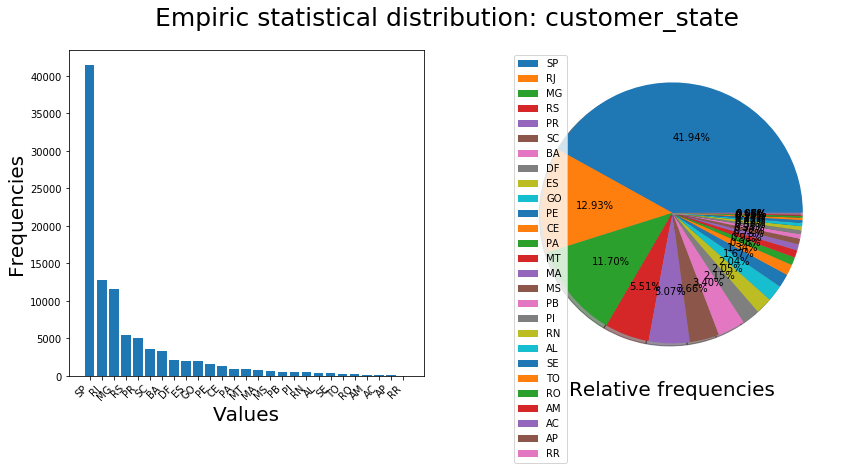

In [84]:
# %%flake8  # checking PEP8 compliance

fig = functions_p5.categorical_distribution(data_customers, 'customer_state')
fig.savefig('plots/customer_states.png')

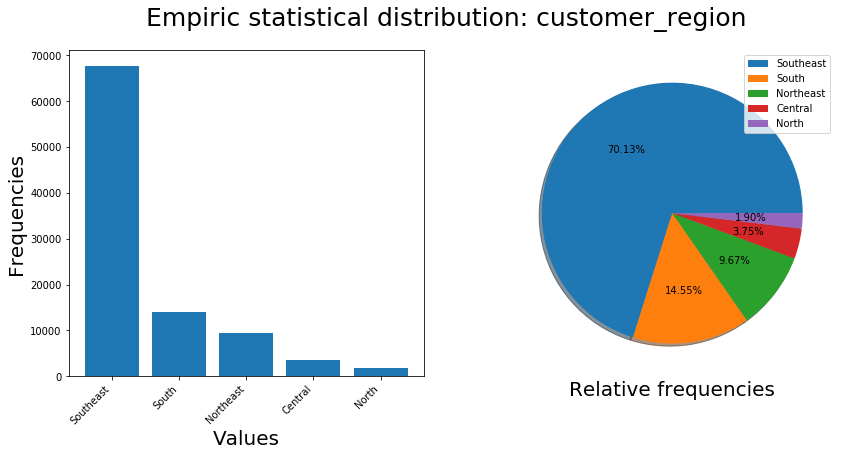

In [85]:
fig = functions_p5.categorical_distribution(data_customers, 'customer_region')
fig.savefig('plots/customer_regions.png')

Pour simplifier le modèle, nous créons une variable binaire 'region_Southeast'.

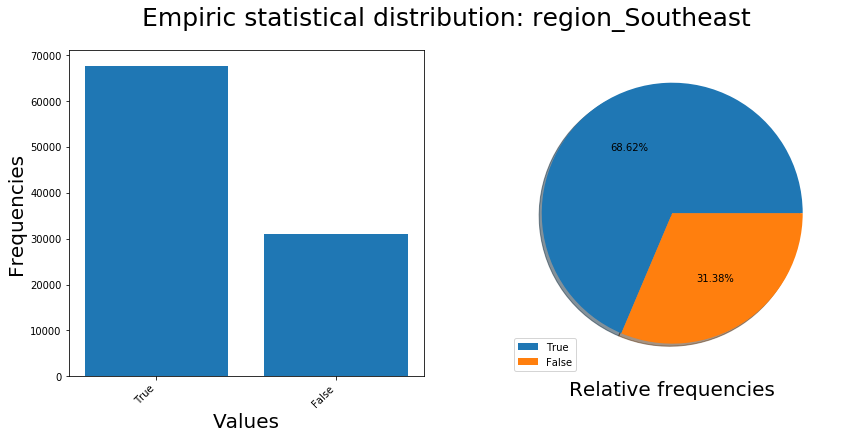

In [86]:
# %%flake8  # checking PEP8 compliance

# Conversion en variable booléenne 'region_Southeast'
data_customers['region_Southeast'] =\
    (data_customers['customer_region'] == 'Southeast')

# Display percentages
fig = functions_p5.categorical_distribution(data_customers, 'region_Southeast')
fig.savefig('plots/region_Southeast.png')

## Binarisation du nombre de commandes

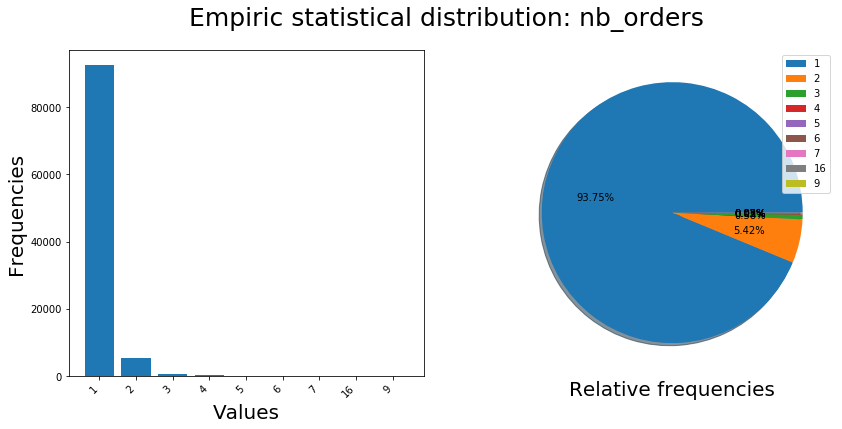

In [87]:
fig = functions_p5.categorical_distribution(data_customers, 'nb_orders')
fig.savefig('plots/nb_orders.png')

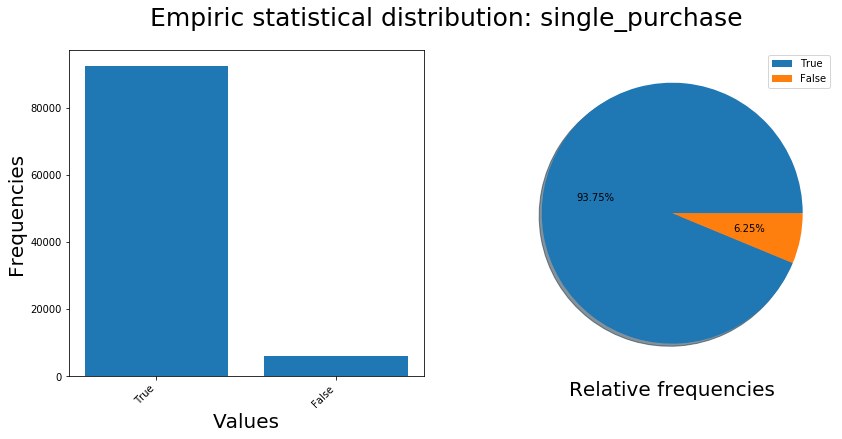

In [88]:
# %%flake8  # checking PEP8 compliance

# Conversion en variable booléenne 'region_Southeast'
data_customers['single_purchase'] = (data_customers['nb_orders'] == 1)

# Display results
fig = functions_p5.categorical_distribution(data_customers, 'single_purchase')
fig.savefig('plots/single_purchase.png')

# **Corrélations** entre les variables

La librairie dython (http://shakedzy.xyz/dython/) permet de calculer :
* pour les couples de variables quantitatives :
    * le coefficient de correlation linéaire de Pearson R 
    
    
* pour les couples de variables catégorielles :
    * le coefficient de Cramer V (symetrique)
    * le coefficient d'incertitude de Theil U (asymetrique)
    
    
* pour les couples de variables mixtes (quantitative + catégorielle) :
    * le ratio de correlation η (eta)

## **Matrice** des corrélations

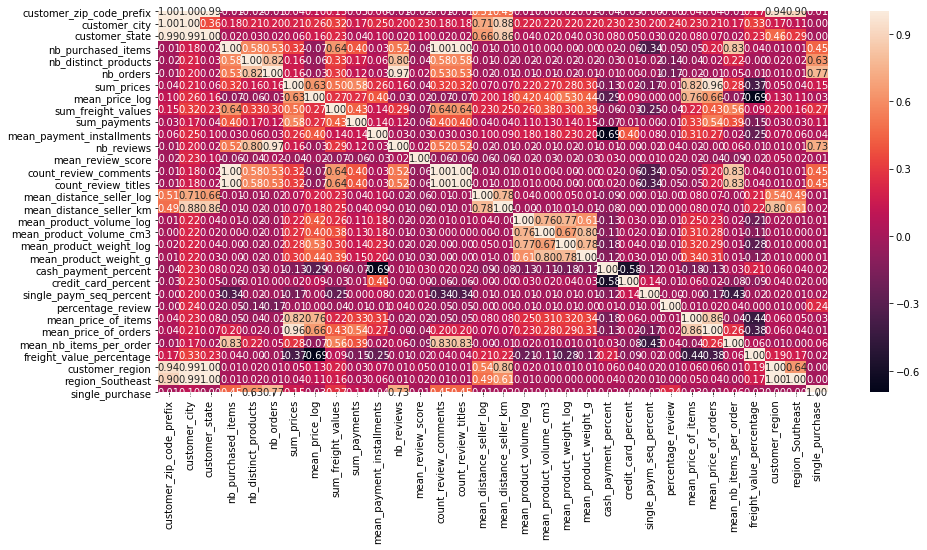

In [89]:
# %%flake8  # checking PEP8 compliance

correlations_matrix = functions_p5.categorical_matrix(
    data_customers,
    return_results=True
)

## **Identification** des sous-ensembles corrélés

In [90]:
# %%flake8  # checking PEP8 compliance

list_of_correlated_subsets = functions_p5.find_colinear_features(
    correlations_matrix,
    threshold=0.9
)

Subset(s) of correlated features above threshold 0.9:
{'customer_city', 'customer_state', 'customer_zip_code_prefix', 'customer_region'}
{'customer_zip_code_prefix', 'customer_city', 'region_Southeast', 'customer_region', 'customer_state'}
{'customer_state', 'region_Southeast', 'customer_zip_code_prefix', 'customer_region'}
{'count_review_titles', 'count_review_comments', 'nb_purchased_items'}
{'nb_orders', 'nb_reviews'}
{'mean_price_of_orders', 'sum_prices'}
{'customer_zip_code_prefix', 'customer_region', 'region_Southeast'}


## **Élimination** des variables fortement corrélées

In [91]:
# %%flake8  # checking PEP8 compliance

def remove_colinear_features(data_customers):

    # We remove highly correlated features
    data_customers = data_customers.drop(columns=[
        'customer_zip_code_prefix',  # strongly correlated to 'customer_region'
        'customer_city',  # strongly correlated to 'customer_region'
        'nb_purchased_items',  # strongly correlated to 'count_review_comments'
        'count_review_titles',  # correlated to 'count_review_comments'
        'sum_prices',  # strongly correlated to 'mean_price_of_orders'
        'customer_state',  # strongly correlated to 'customer_region'
        'customer_region',  # strongly correlated to 'region_Southeast'
        'nb_orders',  # strongly correlated to nb_reviews
    ])

    return data_customers


data_customers = remove_colinear_features(data_customers)

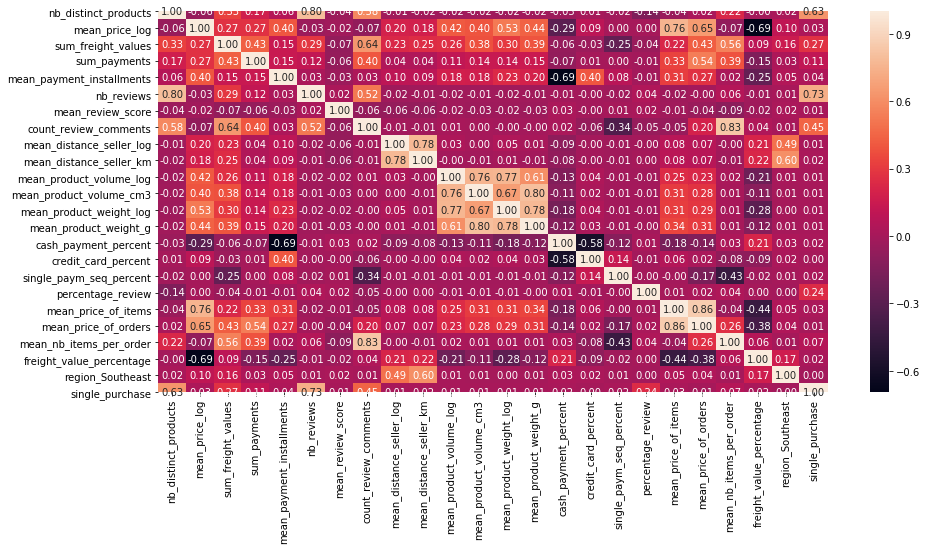

No found correlated features above threshold 0.9.


In [92]:
# %%flake8  # checking PEP8 compliance

correlations_matrix = functions_p5.categorical_matrix(
    data_customers,
    return_results=True
)
list_of_correlated_subsets = functions_p5.find_colinear_features(
    correlations_matrix,
    threshold=0.9
)

# **Pré-traitement** (encodages, standardisation)

## **Encodage "*one-hot*"** des variables catégorielles ('customer_state')
Les algorithmes de *clustering* n'acceptant en entrée que des données numériques, nous allons encoder numériquement les données qui ne sont pas numériques (données catégorielles).

## **Encodage "fréquentiel"** des variables multi-fréquentielles
Nous souhaitons encoder les variables catégorielles *'product_categories'* et *'payment_types'*, en conservant l'information sur la fréquence de chaque catégorie.

In [95]:
# %%flake8  # checking PEP8 compliance


# Function to convert list of values to a value:frequency dict
def list_to_dict(my_list):
    dictionnary = {}
    for item in my_list:
        if item not in dictionnary.keys():
            dictionnary[item] = 1
        else:
            dictionnary[item] += 1
    return dictionnary

In [96]:
# %%flake8  # checking PEP8 compliance

def frequency_encoding(feature, prefix):

    # ------------------------------------------------
    # Function to FrequencyVectorize a dictionnary
    def frequency_encoding_from_dict(dictionnary):
        frequencies = pd.Series()
        total_frequency = sum(dictionnary.values())

        for key, value in dictionnary.items():
            frequencies[prefix + key] = value / total_frequency

        return frequencies

    # ------------------------------------------------
    # Convert lists to dictionnary
    data_customers[feature] = data_customers[feature].apply(list_to_dict)

    # Proceed to the frequency encoding
    frequency_df = data_customers[feature]\
        .apply(frequency_encoding_from_dict).fillna(0)

    # Return the frequency_encoding pd.DataFrame
    return frequency_df


# --------------------------------------------------------
# Apply the transformation to all multifrequency features

# Dictionnary of multifrequency features and prefix
multifreq_dict = {
    # 'payment_types':'pay_',
    # 'product_categories':'cat_',
    'order_seasons': 'season_',
    'product_main_categories': 'main_cat_',
}

for feature, prefix in multifreq_dict.items():
    # get the DataFrame with frequency encoded data
    frequency_df = frequency_encoding(feature, prefix)

    # add the columns to the data_customers table
    data_customers = pd.concat(
        [data_customers, frequency_df],
        sort=False,
        axis=1
    )

## **Encodage numérique** des variables temporelles

In [97]:
# %%flake8  # checking PEP8 compliance

# Getting 'timedelta' and 'datetime' features
timeseries_features = data_customers.select_dtypes(
    include=['timedelta', 'datetime']
).columns

# Converting 'timedelta' and 'datetime' features to integers
for feature in timeseries_features:
    data_customers[feature] = data_customers[feature].values.astype('int64')

## **Sauvegarde** des données clients encodées

In [98]:
# Save the file (text type)
data_customers.to_csv("data\cleaned\p5_data_encoded.csv", index=False)

In [99]:
# Load the file
data_customers = pd.read_csv("data\cleaned\p5_data_encoded.csv")

In [100]:
# Displays the global filling rate of the DataFrame
functions_p5.global_filling_rate(data_customers)

DataFrame has 98756 rows and 47 columns.

Global filling rate of the DataFrame: 100.00%
Missing values in the DataFrame: 0 (0.00%)

Number of rows with missing values: 0 (0.00%)
Number of columns with missing values: 0 (0.00%)


## Suppression des variables non-pertinentes

In [101]:
# Inspect columns before deleting them
print("Number of features:", data_customers.shape[1])
data_customers.head(2)

Number of features: 47


,nb_distinct_products,mean_price_log,sum_freight_values,sum_payments,mean_payment_installments,nb_reviews,mean_review_score,count_review_comments,first_order_purchase_timestamp,last_order_purchase_timestamp,mean_distance_seller_log,mean_distance_seller_km,mean_product_volume_log,mean_product_volume_cm3,mean_product_weight_log,mean_product_weight_g,cash_payment_percent,credit_card_percent,single_paym_seq_percent,product_categories,payment_types,order_seasons,product_main_categories,activity_period,percentage_review,mean_period_between_orders,mean_price_of_items,mean_price_of_orders,mean_nb_items_per_order,freight_value_percentage,region_Southeast,single_purchase,season_spring,season_winter,season_summer,season_automn,main_cat_furniture,main_cat_home,main_cat_sports_leisure,main_cat_electronics,main_cat_fashion,main_cat_supplies,main_cat_health_beauty,main_cat_construction,main_cat_misc,main_cat_gifts,main_cat_food_drink
0,1,4.996333,21.879999,146.869995,2.0,1,4.0,1,1494947135000000000,1494947135000000000,5.857277,348.770504,11.581864,107136.0,9.069238,8683.0,0.0,1.0,1.0,['office_furniture'],['credit_card'],{'spring': 1},{'furniture': 1},0,1.0,0,124.989998,124.989998,1.0,0.148975,True,True,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,5.818539,46.480000,335.480011,8.0,1,5.0,1,1515790104000000000,1515790104000000000,6.027873,413.831857,10.885585,53400.0,9.225328,10150.0,0.0,1.0,1.0,['housewares'],['credit_card'],{'winter': 1},{'home': 1},0,1.0,0,289.000000,289.000000,1.0,0.138548,True,True,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [102]:
# %%flake8  # checking PEP8 compliance

# Dropping useless columns
data_customers = data_customers.drop(
    columns=[
        'nb_distinct_products',  # information encoded
        'sum_payments',  # information encoded in 'mean_price_of_orders'
        'freight_value_percentage',  # not related to customer
        'product_categories',  # frequency encoded
        'payment_types',  # frequency encoded
        'order_seasons',  # frequency encoded
        'product_main_categories',  # frequency encoded
        'count_review_comments',  # encoded by 'percentage_review'
        'nb_reviews',  # encoded by 'percentage_review'
        'sum_freight_values',  # not pertinent
        'mean_payment_installments',  # encoded by 'cash_payment_percent'
        'activity_period',  # not pertinent, not enough variance
        'mean_period_between_orders',  # not pertinent, not enough variance
        'mean_price_of_items',  # redundant with 'mean_price_of_orders'
        'mean_product_weight_g',  # encoded by 'mean_product_weight_log'
        'first_order_purchase_timestamp',  # redundant
        'mean_distance_seller_km',  # encoded by 'mean_distance_seller_log'
        'mean_product_volume_cm3',  # encoded by 'mean_product_volume_log'
        'mean_price_of_orders',  # encoded by 'mean_price_log'

        # 'nb_orders', # strongly correlated to nb_reviews
        # 'customer_city',  # strongly correlated to 'customer_region'
        # 'nb_purchased_items',  # strongly correlated
        # 'count_review_titles',  # strongly correlated
        # 'sum_prices',  # strongly correlated to 'mean_price_of_orders'
        # 'customer_state', # strongly correlated to 'customer_region'
        # 'customer_region', # strongly correlated to 'region_Southeast'
    ])

In [103]:
# %%flake8  # checking PEP8 compliance

data_customers = data_customers.drop(
    columns=[
        # 'mean_price_log',
        # 'mean_review_score',
        'last_order_purchase_timestamp',
        'mean_distance_seller_log',
        # 'mean_product_volume_log',
        # 'mean_product_weight_log',
        # 'cash_payment_percent',
        # 'credit_card_percent',
        'single_paym_seq_percent',
        # 'percentage_review',
        'mean_nb_items_per_order',
        # 'region_Southeast',
        'single_purchase',

        'season_spring',
        'season_winter',
        'season_summer',
        'season_automn',

        'main_cat_furniture',
        'main_cat_home',
        'main_cat_sports_leisure',
        'main_cat_electronics',
        'main_cat_fashion',
        'main_cat_supplies',
        'main_cat_health_beauty',
        'main_cat_construction',
        'main_cat_misc',
        'main_cat_gifts',
        'main_cat_food_drink',
    ])

In [104]:
# Inspect columns before deleting them
print("Number of features:", data_customers.shape[1])
data_customers.head(2)

Number of features: 8


,mean_price_log,mean_review_score,mean_product_volume_log,mean_product_weight_log,cash_payment_percent,credit_card_percent,percentage_review,region_Southeast
0,4.996333,4.0,11.581864,9.069238,0.0,1.0,1.0,True
1,5.818539,5.0,10.885585,9.225328,0.0,1.0,1.0,True


## **Pré-traitement** (centrage et réduction)

In [105]:
# %%flake8  # checking PEP8 compliance

from sklearn.preprocessing import StandardScaler

# Apply the standard scaler and save it in a DataFrame
std_scaler = StandardScaler()
data_customers_std = data_customers.copy()
data_customers_std.iloc[:, :] = std_scaler.fit_transform(data_customers)

# Display final results
display(data_customers_std.head())

,mean_price_log,mean_review_score,mean_product_volume_log,mean_product_weight_log,cash_payment_percent,credit_card_percent,percentage_review,region_Southeast
0,0.482929,-0.066376,2.159420,1.804974,-0.987330,0.576288,0.044205,0.676214
1,1.541328,0.684083,1.610604,1.923503,-0.987330,0.576288,0.044205,0.676214
2,0.574159,0.684083,1.492481,1.767697,-0.987330,0.576288,0.044205,0.676214
3,0.694613,0.684083,1.928892,2.060691,1.032632,0.576288,0.044205,0.676214
4,1.175535,0.684083,0.967832,1.415700,-0.987330,0.576288,0.044205,0.676214


## **Sauvegarde** des données clients standardisées

In [106]:
data_customers_std.describe()

,mean_price_log,mean_review_score,mean_product_volume_log,mean_product_weight_log,cash_payment_percent,credit_card_percent,percentage_review,region_Southeast
count,9.875600e+04,9.875600e+04,9.875600e+04,9.875600e+04,9.875600e+04,9.875600e+04,9.875600e+04,9.875600e+04
mean,-1.996054e-16,2.381163e-16,-1.691493e-15,2.261367e-16,-2.104518e-17,1.766896e-16,-6.639484e-16,1.392219e-16
std,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00
min,-2.947316e+00,-2.317751e+00,-2.926098e+00,-5.081872e+00,-9.873304e-01,-1.804140e+00,-1.361932e+01,-1.478821e+00
25%,-7.057125e-01,-6.637574e-02,-6.973264e-01,-7.481021e-01,-9.873304e-01,-6.139262e-01,4.420485e-02,-1.478821e+00
50%,-6.513165e-02,6.840825e-01,-6.148971e-02,-1.061383e-01,-9.873304e-01,5.762880e-01,4.420485e-02,6.762144e-01
75%,6.072243e-01,6.840825e-01,7.535005e-01,6.103889e-01,1.032632e+00,5.762880e-01,4.420485e-02,6.762144e-01
max,5.435470e+00,6.840825e-01,2.960998e+00,2.972867e+00,1.032632e+00,5.762880e-01,2.053948e+01,6.762144e-01


In [107]:
# Save the file (text type)
data_customers_std.to_csv("data\cleaned\p5_data_std.csv", index=False)

# **Réduction dimensionnelle** par ACP
Pour faciliter le traitement des données par les algorithmes de clustering et lutter contre "*la malédiction de la dimensionnalité*", nous procédons à une réduction dimensionnelle préalable.

## Eboulis des valeurs propres

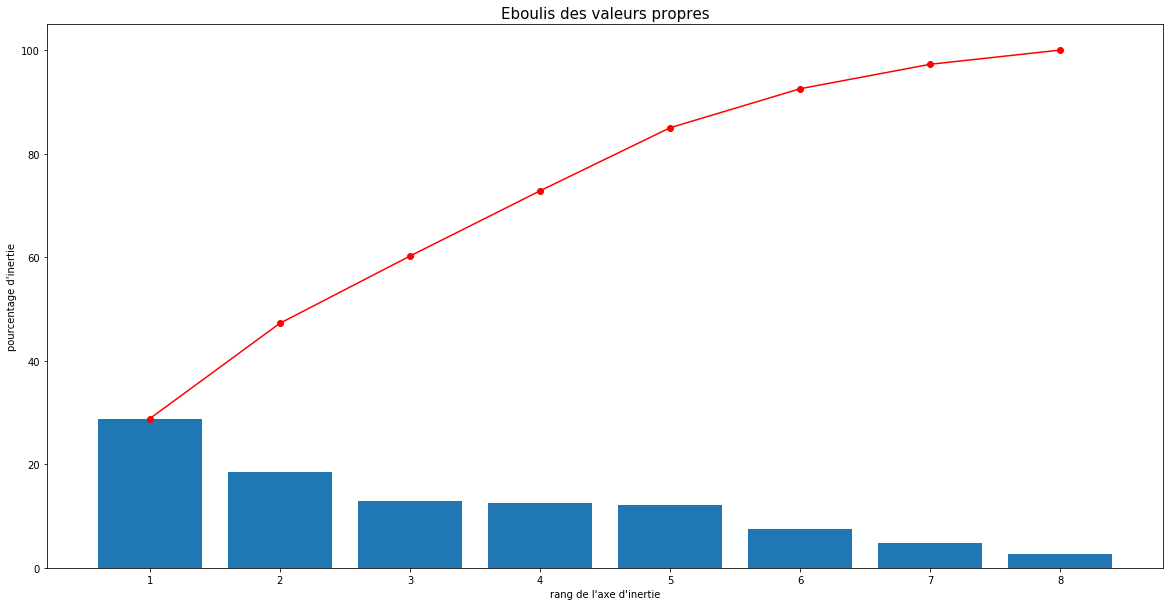

In [108]:
# Scree plot
functions_p5.display_scree_plot(data_customers_std)

## Projection sur les axes d'inertie jusqu'à 90% de variance

In [109]:
# %%flake8  # checking PEP8 compliance

# Proceed to features reduction, up to 90% of variance
data_PCA = functions_p5.PCA_features_reduction(
    data_customers_std,
    var_threshold=0.9
)

# Convert to pd.DataFrame and set columns names
col_names = ["PCA_F{}".format(i) for i in range(1, data_PCA.shape[1]+1)]
data_PCA = pd.DataFrame(data_PCA, columns=col_names)

# Display resulting DataFrame
display(data_PCA.head(2))

# Save the file (text type)
data_PCA.to_csv("data\cleaned\p5_data_PCA.csv", index=False)

Initial number of features: 8
Number of selected features: 6
Cumulative explained variance:  92.53%


,PCA_F1,PCA_F2,PCA_F3,PCA_F4,PCA_F5,PCA_F6
0,2.825938,0.205086,0.819559,-0.435504,0.410791,-0.843533
1,3.099987,0.161057,1.072663,-0.035779,-0.238990,0.200269


## Projection des individus dans le premier plan factoriel

In [110]:
# %%flake8  # checking PEP8 compliance

def display_factorial_planes(dataframe, target_name):
    """This function displays the scree plot of proper values
    for PCA decomposition.

    Future improvements
    -------------------
    * coloration of points depending on values of target
    * simplification of code
    * finish documentation and translate comments
    """

    from sklearn import decomposition

    # initialisation de la figure
    fig = plt.figure(figsize=(15, 8))

    # Preprocessing for the PCA
    # (X_std, y) = preprocessing_tSNE(dataframe, target_name)
    X_std = dataframe
    y = dataframe[target_name]

    # Applying the PCA
    pca = decomposition.PCA(n_components=2)
    X_projected = pca.fit_transform(X_std)

    # affichage des points
    plt.scatter(
        X_projected[:, 0],
        X_projected[:, 1],
        c=y,
        cmap=plt.cm.get_cmap('RdYlGn_r'),
    )

    # Set-up and displays the colorbar
    cbar = plt.colorbar()
    cbar.ax.get_yaxis().set_ticks([])
    cbar.ax.get_yaxis().labelpad = 15
    cbar.set_label(target_name, rotation=90)

    # détermination des limites du graphiquè
    boundary_right = np.max(np.abs(X_projected[:, 0])) * 1.1
    boundary_left = np.min(X_projected[:, 0]) * 1.3
    boundary_up = np.max(X_projected[:, 1]) * 1.1
    boundary_down = np.min(X_projected[:, 1]) * 1.1
    plt.xlim([boundary_left, boundary_right])
    plt.ylim([boundary_down, boundary_up])

    # affichage des lignes horizontales et verticales
    plt.plot([-100, 100], [0, 0], color='grey', ls='--')
    plt.plot([0, 0], [-100, 100], color='grey', ls='--')

    # nom des axes, avec le pourcentage d'inertie expliquée
    plt.xlabel('F1 ({}%)'.format(
        round(100*pca.explained_variance_ratio_[0], 1))
              )
    plt.ylabel('F2 ({}%)'.format(
        round(100*pca.explained_variance_ratio_[1], 1))
              )

    plt.title("Projection des individus (sur F1 et F2)", fontsize=15)
    plt.show(block=False)
    return fig

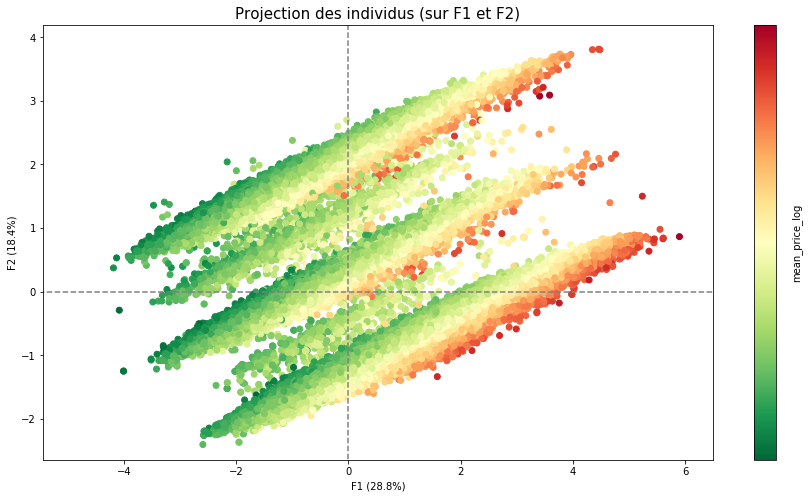

In [112]:
# %%flake8  # checking PEP8 compliance

fig = display_factorial_planes(data_customers_std, target_name='mean_price_log')